In [1]:
#Makes jupyter notebook maximized in window; remove if you don't want
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Jupyter Notebook Overview

Documentation: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/examples_index.html  

Jupyter notebook is pretty straightforward to use; the link above is good for learning about it. The absolute minimum things you need to know are: 
* Every grey block is called a "cell"
* Each cell can contain code or actual formatted text
* You can double click some of the cells with formatted text (like this one) to see how to format things
* By default, a new cell is a python code cell. To convert a code cell to a markdown (formatted text) cell, you can either press escape, then press m, then press enter, or go into the "Cell" Menu at the top right and change the "Cell Type" to markdown. 
* To run a cell once you have written code inside of it, you can press shift+enter
* To add a cell above or below your current cell, go to the "Edit" menu
* A little asterisk next to the cell means that code is currently running
* Any figure outputs of a cell will be displayed immediately after it finishes running
* To run a cell and immediately create a new cell below it, you can press option+enter
* variables names are preserved between cells. If you create a dataframe called "df" in once cell, any changes you make to it will propogate to all other cells using "df". Therefore it's important to copy versions of dataframes you don't want to change to each cell instead of changing the original dataframe itself. You will notice throughout this notebook I repeatedly copy the dataframe df; this lets each cell be run independently. 
* If you want to interrupt a running cell (for example if you realized the figure you are plotting is too/large complicated). Go to the kernel menu and click interrupt

# Python Overview
## General Syntax
### Major symbols
* Colons : in python means all  
* Brackets [ ] are used to group objects together into *lists*; each object in a list is separated with a comma (,): [ 1,2,3 ]. Members (or *elements*) of a list are accessed by using brackets next to a list to get the n+1th element in the list (example: a[ 3 ] gets fourth value in a list called a). These numbers used to grab values in the list (3 in the previous example) are called a list's *indices*  
* Apostrophes (') signify a *string* (non-numeric) variable: [ 'a','b','c' ]  
* Braces { } are used to make *dictionaries*; which are lists, except insteading of using numbers to access *elements* you use non numeric *strings* to access elements, which are called the dictionary's *keys*  
An example of a dictionary: a = {'first':3,'what':5}
a['first'] would return 3, a['what'] would return 5

### List indexing
* All objects in python start their numbering at 0. If I wanted to get the nth element in a list, I would use the n-1th index in the list to access that element; third element would be *name of list*[ 2 ] etc.  
* Negative values start at the back of a list: *name of list*[ -1 ] gives me the last element in a list, *name of list*[ -3 ] gives me the third to last element in a list etc.  
* Colons : usually mean "all" like mentioned before, but can also be used to *slice* a list (give multiple values from a list) if they are followed or preceded by a number *name of list*[ 2: ] would give all values from the third value onwards, while *name of list*[ :3 ] gives you everything up to the **second** element

### Further info:
The main purpose of this notebook is to introduce you to pandas/seaborn; The above intro to syntax should be enough for basic pandas/seaborn commands. If you are confused, I **highly** recommend you read a true python tutorial that introduces topics such as loops, if statements, variables etc. such as the one in this website: https://www.learnpython.org/. For the rest of the notebook, I will assume you know the basics of python and won't explain low level details of my commands (for example if I use a loop I won't bother explaining how the loop works). I *will* explain all pandas and seaborn functions that are used, as memorizing them will be a key part of becoming familiar with using pandas/seaborn for data analysis and visualization. 

In [6]:
#Imports packages needed to parse and plot the data
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
idx = pd.IndexSlice

In [7]:
#Read pickle file we will use for tutorial
df = pd.read_pickle('initialSingleCellDf-channel-20200402-HaiyingData.pkl')
#Read hdf file (more compressed version of pickle file)
#df = pd.read_hdf('initialSingleCellDf-channel-20200402-HaiyingData.hdf',key='df')

# Pandas Overview
Pandas documentation (can be hit or miss) is here: https://pandas.pydata.org/docs/  

The purpose of pandas is to organize massive, complex datasets into single objects called **dataframes**  
A Pandas dataframe is essentially a giant excel spreadsheet with both labels and data that you can manipulate much more easily than excel.  
Run the cell below to look at a pandas dataframe. Keep in mind that this nice formatting for a dataframe within jupyter notebook **only** works if the **last** thing in the cell is the dataframe's name

In [91]:
df

Marker                                      Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Time Event                                     
TCells   BoneMarrow BV5  1      72.0 1       367          480  685       333   
                                     2       418          426  648       382   
                                     3       393          436  687       338   
                                     4       391          495  676       261   
                                     5       380          393  674       289   
...                                          ...          ...  ...       ...   
         Spleen     Loop 5      72.0 1243    326          249  680       358   
                                     1244    393          343  644       164   
                                     1245    328          506  629       180   
                                     1246    378          358  597       242   
                                     1247    389          404  655       326   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR  Sample Time Event                                   
TCells   BoneMarrow BV5  1      72.0 1        265  152  510       178  269   
                                     2        261  745  427       231  448   
                                     3        283  201  356       268  437   
                                     4        244  191  500       197  349   
                                     5        259  255  460       224  402   
...                                           ...  ...  ...       ...  ...   
         Spleen     Loop 5      72.0 1243     253  192  379       342  247   
                                     1244     266  192  455       273  407   
                                     1245     274  226  509       337  603   
                                     1246     244  720  430       236  275   
                                     1247     258  242  601       204  344   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Time Event                                 
TCells   BoneMarrow BV5  1      72.0 1       245   558  729   266     898  
                                     2       240   587  250   161     559  
                                     3       300   614  738   328     848  
                                     4       307   515  730   206     874  
                                     5       281   618  719   306     826  
...                                          ...   ...  ...   ...     ...  
         Spleen     Loop 5      72.0 1243    130   595  731   188     842  
                                     1244    283   599  653   308     860  
                                     1245    398   288  734   381     626  
                                     1246    206   522  308   222     717  
                                     1247    220   565  753   326     846  

[64387 rows x 14 columns]

Note that the nice display above only shows a fraction of the 64387 rows and 14 columns of this dataframe. 

## Dataframe structure:
### Overall structure:

Pandas dataframes are always 2D, and therefore always have two **axes**: 
1. The vertical axis, along the rows of the dataframe, is called the **index**, and is also referred to as axis 0, 
2. The horizontal axis, along the columns of the dataframe, is called the **columns**, and is also referred to as axis 1.  

These two components enclose and label the actual numerical data, which are called the **values** of the dataframe. 
We use the index and columns of a dataframe to select and group the values, which we then plot or perform other manipulation on. 

### Index (row labels): 
The index is composed of **levels** (groups), and **level values** (labels in each group).  In the dataframe above, the index **levels** are: 'CellType', 'Tissue', 'CAR', 'Sample', 'Time', 'Event'  The index **level values** for the "Tissue" level for example would be "BoneMarrow", "Spleen"

In [92]:
df.index

MultiIndex([('TCells', 'BoneMarrow',  'BV5', '1', 72.0,    1),
            ('TCells', 'BoneMarrow',  'BV5', '1', 72.0,    2),
            ('TCells', 'BoneMarrow',  'BV5', '1', 72.0,    3),
            ('TCells', 'BoneMarrow',  'BV5', '1', 72.0,    4),
            ('TCells', 'BoneMarrow',  'BV5', '1', 72.0,    5),
            ('TCells', 'BoneMarrow',  'BV5', '1', 72.0,    6),
            ('TCells', 'BoneMarrow',  'BV5', '1', 72.0,    7),
            ('TCells', 'BoneMarrow',  'BV5', '1', 72.0,    8),
            ('TCells', 'BoneMarrow',  'BV5', '1', 72.0,    9),
            ('TCells', 'BoneMarrow',  'BV5', '1', 72.0,   10),
            ...
            ('TCells',     'Spleen', 'Loop', '5', 72.0, 1238),
            ('TCells',     'Spleen', 'Loop', '5', 72.0, 1239),
            ('TCells',     'Spleen', 'Loop', '5', 72.0, 1240),
            ('TCells',     'Spleen', 'Loop', '5', 72.0, 1241),
            ('TCells',     'Spleen', 'Loop', '5', 72.0, 1242),
            ('TCells',     'Spleen', 'L

### Columns (column labels): 
The column has the exact same structure as the index with **levels** and **level values**. In this dataframe, the column *levels* are: 'Marker'  The column *level values* for the "Marker" level for example would be 'Size', 'Granularity', 'cd3', 'car cd19', 'tumor', 'cd4', 'ld', 'car cd22', 'pd1', 'lag3', 'ccr7', 'cd8', 'tim3', 'cd45ra'

In [93]:
df.columns

Index(['Size', 'Granularity', 'cd3', 'car cd19', 'tumor', 'cd4', 'ld',
       'car cd22', 'pd1', 'lag3', 'ccr7', 'cd8', 'tim3', 'cd45ra'],
      dtype='object', name='Marker')

It should be apparent that these two axes are basically the same from pandas' point of view; any command that works with the index will also work with the columns and vice versa (just replace df.index with df.columns or set axis=0 to axis=1). You do have to make sure the labels you provide in those commands match with the actual labels in the axis you are switching to however. 

Also, by convention, the columns is usually kept pretty simple in a pandas dataframe, with only a few levels (ideally only one like we have here). This is because it is difficult to read many values horizontally but much easier to read a complex structure vertically as with the index. 

### Values (2D data matrix that each pair of horizontal + vertical labels describes): 
Note that values are returned as a numpy matrix, which can be useful when using functions that only accept numpy objects

In [94]:
print(df.values)

[[367 480 685 ... 729 266 898]
 [418 426 648 ... 250 161 559]
 [393 436 687 ... 738 328 848]
 ...
 [328 506 629 ... 734 381 626]
 [378 358 597 ... 308 222 717]
 [389 404 655 ... 753 326 846]]


## General purpose dataframe commands
### Displaying small parts of dataframe
df.head() shows the first few rows of a dataframe, df.tail() shows the last few rows of a dataframe.  
Putting a number *x* inside the parentheses shows *x* lines (default number is 5)

In [95]:
df.head()

Marker                                     Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR Sample Time Event                                     
TCells   BoneMarrow BV5 1      72.0 1       367          480  685       333   
                                    2       418          426  648       382   
                                    3       393          436  687       338   
                                    4       391          495  676       261   
                                    5       380          393  674       289   

Marker                                     tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR Sample Time Event                                   
TCells   BoneMarrow BV5 1      72.0 1        265  152  510       178  269   
                                    2        261  745  427       231  448   
                                    3        283  201  356       268  437   
                                    4        244  191  500       197  349   
                                    5        259  255  460       224  402   

Marker                                     lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR Sample Time Event                                 
TCells   BoneMarrow BV5 1      72.0 1       245   558  729   266     898  
                                    2       240   587  250   161     559  
                                    3       300   614  738   328     848  
                                    4       307   515  730   206     874  
                                    5       281   618  719   306     826

In [96]:
df.tail()

Marker                                  Size  Granularity  cd3  car cd19  \
CellType Tissue CAR  Sample Time Event                                     
TCells   Spleen Loop 5      72.0 1243    326          249  680       358   
                                 1244    393          343  644       164   
                                 1245    328          506  629       180   
                                 1246    378          358  597       242   
                                 1247    389          404  655       326   

Marker                                  tumor  cd4   ld  car cd22  pd1  lag3  \
CellType Tissue CAR  Sample Time Event                                         
TCells   Spleen Loop 5      72.0 1243     253  192  379       342  247   130   
                                 1244     266  192  455       273  407   283   
                                 1245     274  226  509       337  603   398   
                                 1246     244  720  430       236  275   206   
                                 1247     258  242  601       204  344   220   

Marker                                  ccr7  cd8  tim3  cd45ra  
CellType Tissue CAR  Sample Time Event                           
TCells   Spleen Loop 5      72.0 1243    595  731   188     842  
                                 1244    599  653   308     860  
                                 1245    288  734   381     626  
                                 1246    522  308   222     717  
                                 1247    565  753   326     846

In [97]:
df.head(10)

Marker                                     Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR Sample Time Event                                     
TCells   BoneMarrow BV5 1      72.0 1       367          480  685       333   
                                    2       418          426  648       382   
                                    3       393          436  687       338   
                                    4       391          495  676       261   
                                    5       380          393  674       289   
                                    6       344          261  574       313   
                                    7       377          335  643       310   
                                    8       476          567  600       416   
                                    9       472          531  562       373   
                                    10      388          379  629       303   

Marker                                     tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR Sample Time Event                                   
TCells   BoneMarrow BV5 1      72.0 1        265  152  510       178  269   
                                    2        261  745  427       231  448   
                                    3        283  201  356       268  437   
                                    4        244  191  500       197  349   
                                    5        259  255  460       224  402   
                                    6        263  215  483       238  393   
                                    7        277  199  386       316  678   
                                    8        344  777  575       540  529   
                                    9        332  724  519       223  618   
                                    10       297  264  332       240  420   

Marker                                     lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR Sample Time Event                                 
TCells   BoneMarrow BV5 1      72.0 1       245   558  729   266     898  
                                    2       240   587  250   161     559  
                                    3       300   614  738   328     848  
                                    4       307   515  730   206     874  
                                    5       281   618  719   306     826  
                                    6       241   514  621   183     827  
                                    7       246   546  666   277     835  
                                    8       257   294  206   197     229  
                                    9       241   262  236   179     129  
                                    10      293   544  725   204     758

### Displaying index or column *levels*

In [98]:
print(df.index.names)
print(df.columns.names)

['CellType', 'Tissue', 'CAR', 'Sample', 'Time', 'Event']
['Marker']


### Displaying unique index or column *level values*
".unique()" command prevents repeating. ".tolist()" converts the strange pandas "FrozenList" object into a regular list 

In [99]:
print(df.index.unique(level='CellType').tolist())
print(df.index.unique(level='Tissue').tolist())
print(df.index.unique(level='CAR').tolist())
print(df.index.unique(level='Time').tolist())
print(df.columns.unique(level='Marker').tolist())

['TCells']
['BoneMarrow', 'Spleen']
['BV5', 'BV6', 'BV7', 'BV8', 'Loop']
[72.0]
['Size', 'Granularity', 'cd3', 'car cd19', 'tumor', 'cd4', 'ld', 'car cd22', 'pd1', 'lag3', 'ccr7', 'cd8', 'tim3', 'cd45ra']


You can also use a for loop to get the unique level values of each level in a dataframe's index or columns. I skip the last index here (with [:-1]) because it is the event index which has many unique values

In [100]:
for level in df.index.names[:-1]:
    print(df.index.unique(level=level).tolist())

['TCells']
['BoneMarrow', 'Spleen']
['BV5', 'BV6', 'BV7', 'BV8', 'Loop']
['1', '2', '3', '4', '5']
[72.0]


### Changing index or column *level* names
You must change **level** names by directly modifying the list that contains the level names; aka by changing an element in df.index.names (or df.columns.names). I copy the main dataframe df into a new dataframe here by using the .copy() command to avoid modifying the dataframe I use for the rest of my examples. Here I change the fourth level in the original list of levels (as python numbering starts at 0)
#### Before Change:

In [3]:
tempdf = df.copy()
print(tempdf.index.names)

NameError: name 'df' is not defined

#### After Change:

tempdf = df.copy()
newNames = list(tempdf.index.names)
newNames[3] = 'I changed this level'
tempdf.index.names = newNames
print(tempdf.index.names)

### Changing index or column *level value* names
You must change *level value* names by using the .rename() function. The rename function operates a bit strangely. To rename a level value, you pass a **dictionary** that has the original level values as keys and the new level values as values that the keys point to. You then specify the axis that this renaming should operate on by saying axis = 0 (if renaming level values on the index) or axis = 1 (if renaming level values on the columns). In this example, I change the names of the BV5 and BV8 level values in the index
#### Before Change:

In [102]:
tempdf = df.copy()
print(tempdf.index.unique(level='CAR'))

Index(['BV5', 'BV6', 'BV7', 'BV8', 'Loop'], dtype='object', name='CAR')


#### After Change:

In [103]:
tempdf = df.copy()
renamingDict = {'BV5':'I changed this level value','BV8':'I changed this level value too!'}
tempdf = tempdf.rename(renamingDict,axis=0)
print(tempdf.index.unique(level='CAR'))

Index(['I changed this level value', 'BV6', 'BV7',
       'I changed this level value too!', 'Loop'],
      dtype='object', name='CAR')


## Reorganizing Data
### Moving index levels to columns and vice versa
This can be useful when wanting to perform actions on different groups of data; actions can often be specified to be performed *along* the columns or rows of a dataframe, so changing the levels which are in the columns and rows of a dataframe can allow you to manipulate your data in different ways.  
  
The "stack" command is used to move a level from the columns of a dataframe to the index. You can move multiple levels at once; the order you pass them in will be their order in their new axis. The lack of fancy formatting is because this dataframe is now 1D as the only level in the columns has been moved to the index (so columns does not exist any more). This means the dataframe is now a Pandas series, which doesn't get formatted the same way by jupyter notebook. We will learn how to convert between series and dataframes later on. 

In [104]:
tempdf = df.stack()
tempdf

CellType  Tissue      CAR   Sample  Time  Event  Marker     
TCells    BoneMarrow  BV5   1       72.0  1      Size           367
                                                 Granularity    480
                                                 cd3            685
                                                 car cd19       333
                                                 tumor          265
                                                               ... 
          Spleen      Loop  5       72.0  1247   lag3           220
                                                 ccr7           565
                                                 cd8            753
                                                 tim3           326
                                                 cd45ra         846
Length: 901418, dtype: int64

The "unstack" command is used to move a level from the index of a dataframe to the columns; the opposite of stack. It functions exactly the same.

In [105]:
tempdf = df.unstack('CAR')
tempdf

Marker                                  Size                              \
CAR                                      BV5    BV6    BV7    BV8   Loop   
CellType Tissue     Sample Time Event                                      
TCells   BoneMarrow 1      72.0 1      367.0  413.0  422.0  390.0  525.0   
                                2      418.0  390.0  401.0  576.0  332.0   
                                3      393.0  285.0  453.0  509.0  305.0   
                                4      391.0  327.0  623.0  455.0  457.0   
                                5      380.0  332.0  419.0  446.0  494.0   
...                                      ...    ...    ...    ...    ...   
         Spleen     5      72.0 2452   408.0    NaN    NaN    NaN    NaN   
                                2453   400.0    NaN    NaN    NaN    NaN   
                                2454   349.0    NaN    NaN    NaN    NaN   
                                2455   314.0    NaN    NaN    NaN    NaN   
                                2456   453.0    NaN    NaN    NaN    NaN   

Marker                                Granularity                              \
CAR                                           BV5    BV6    BV7    BV8   Loop   
CellType Tissue     Sample Time Event                                           
TCells   BoneMarrow 1      72.0 1           480.0  489.0  520.0  362.0  613.0   
                                2           426.0  496.0  677.0  613.0  361.0   
                                3           436.0  445.0  618.0  751.0  353.0   
                                4           495.0  370.0  721.0  757.0  502.0   
                                5           393.0  329.0  634.0  474.0  633.0   
...                                           ...    ...    ...    ...    ...   
         Spleen     5      72.0 2452        386.0    NaN    NaN    NaN    NaN   
                                2453        384.0    NaN    NaN    NaN    NaN   
                                2454        282.0    NaN    NaN    NaN    NaN   
                                2455        456.0    NaN    NaN    NaN    NaN   
                                2456        761.0    NaN    NaN    NaN    NaN   

Marker                                 ...   tim3                              \
CAR                                    ...    BV5    BV6    BV7    BV8   Loop   
CellType Tissue     Sample Time Event  ...                                      
TCells   BoneMarrow 1      72.0 1      ...  266.0  279.0  185.0  246.0  177.0   
                                2      ...  161.0  238.0  311.0  466.0  155.0   
                                3      ...  328.0    0.0  162.0  481.0  358.0   
                                4      ...  206.0  420.0  189.0  273.0  309.0   
                                5      ...  306.0  321.0  164.0  287.0  203.0   
...                                    ...    ...    ...    ...    ...    ...   
         Spleen     5      72.0 2452   ...  244.0    NaN    NaN    NaN    NaN   
                                2453   ...  265.0    NaN    NaN    NaN    NaN   
                                2454   ...  181.0    NaN    NaN    NaN    NaN   
                                2455   ...  206.0    NaN    NaN    NaN    NaN   
                                2456   ...  310.0    NaN    NaN    NaN    NaN   

Marker                                cd45ra                              
CAR                                      BV5    BV6    BV7    BV8   Loop  
CellType Tissue     Sample Time Event                                     
TCells   BoneMarrow 1      72.0 1      898.0  490.0  198.0  554.0  160.0  
                                2      559.0  592.0  342.0  551.0  827.0  
                                3      848.0    0.0  190.0  576.0  626.0  
                                4      874.0  452.0  281.0  462.0  256.0  
                                5      826.0  396.0  261.0  843.0  240.0  
...                                      ...    ...    ...    ...

 I can also demonstrate unstacking multiple levels at once here. Note that if a new index/column label combination does not represent a real datapoint, the datapoints are replaced with NaN (**N**ot **A** **N**umber) values

In [106]:
tempdf = df.unstack(['CAR','Tissue'])
tempdf

Marker                           Size                                   \
CAR                               BV5        BV6        BV7        BV8   
Tissue                     BoneMarrow BoneMarrow BoneMarrow BoneMarrow   
CellType Sample Time Event                                               
TCells   1      72.0 1          367.0      413.0      422.0      390.0   
                     2          418.0      390.0      401.0      576.0   
                     3          393.0      285.0      453.0      509.0   
                     4          391.0      327.0      623.0      455.0   
                     5          380.0      332.0      419.0      446.0   
...                               ...        ...        ...        ...   
         5      72.0 3076         NaN        NaN      436.0        NaN   
                     3077         NaN        NaN      426.0        NaN   
                     3078         NaN        NaN      418.0        NaN   
                     3079         NaN        NaN      374.0        NaN   
                     3080         NaN        NaN      397.0        NaN   

Marker                                                                    ...  \
CAR                              Loop    BV5    BV6    BV7    BV8   Loop  ...   
Tissue                     BoneMarrow Spleen Spleen Spleen Spleen Spleen  ...   
CellType Sample Time Event                                                ...   
TCells   1      72.0 1          525.0  344.0  356.0  335.0  428.0  400.0  ...   
                     2          332.0  362.0  395.0  386.0  347.0  342.0  ...   
                     3          305.0  370.0  417.0  388.0  388.0  370.0  ...   
                     4          457.0  358.0  359.0  447.0  382.0  360.0  ...   
                     5          494.0  318.0  345.0  475.0  330.0  377.0  ...   
...                               ...    ...    ...    ...    ...    ...  ...   
         5      72.0 3076         NaN    NaN    NaN    NaN    NaN    NaN  ...   
                     3077         NaN    NaN    NaN    NaN    NaN    NaN  ...   
                     3078         NaN    NaN    NaN    NaN    NaN    NaN  ...   
                     3079         NaN    NaN    NaN    NaN    NaN    NaN  ...   
                     3080         NaN    NaN    NaN    NaN    NaN    NaN  ...   

Marker                         cd45ra                                   \
CAR                               BV5        BV6        BV7        BV8   
Tissue                     BoneMarrow BoneMarrow BoneMarrow BoneMarrow   
CellType Sample Time Event                                               
TCells   1      72.0 1          898.0      490.0      198.0      554.0   
                     2          559.0      592.0      342.0      551.0   
                     3          848.0        0.0      190.0      576.0   
                     4          874.0      452.0      281.0      462.0   
                     5          826.0      396.0      261.0      843.0   
...                               ...        ...        ...        ...   
         5      72.0 3076         NaN        NaN      184.0        NaN   
                     3077         NaN        NaN      269.0        NaN   
                     3078         NaN        NaN      735.0        NaN   
                     3079         NaN        NaN      449.0        NaN   
                     3080         NaN        NaN      413.0        NaN   

Marker                                                                    
CAR                              Loop    BV5    BV6    BV7    BV8   Loop  
Tissue                     BoneMarrow Spleen Spleen Spleen Spleen Spleen  
CellType Sample Time Event                                                
TCells   1      72.0 1          160.0  863.0  609.0  912.0  914.0  788.0  
                     2          827.0  847.0  699.0  414.0  818.0  784.0  
                     3          626.0  758.0  394.0  906.0  287.0  849.0  
                     4          256.0

### Changing *level* order
This is very rarely useful, but it can be helpful if certain levels have much bigger numbers of level values than others. In general a dataframe's index/columns should have levels with the fewest unique level values first, then slowly expand as you advance along the index/columns, to improve readability.  
To change order, we use the ".reorder_levels" command, and pass in the new order of levels we want. Here we rearrange the levels in reverse order in the index of the dataframe.  
Remember, if we wanted to use this command on the columns, we would simply switch axis=0 to axis=1

In [107]:
newLevelOrder = list(df.index.names)[::-1]
tempdf = df.reorder_levels(newLevelOrder,axis=0)
tempdf

Marker                                      Size  Granularity  cd3  car cd19  \
Event Time Sample CAR  Tissue     CellType                                     
1     72.0 1      BV5  BoneMarrow TCells     367          480  685       333   
2     72.0 1      BV5  BoneMarrow TCells     418          426  648       382   
3     72.0 1      BV5  BoneMarrow TCells     393          436  687       338   
4     72.0 1      BV5  BoneMarrow TCells     391          495  676       261   
5     72.0 1      BV5  BoneMarrow TCells     380          393  674       289   
...                                          ...          ...  ...       ...   
1243  72.0 5      Loop Spleen     TCells     326          249  680       358   
1244  72.0 5      Loop Spleen     TCells     393          343  644       164   
1245  72.0 5      Loop Spleen     TCells     328          506  629       180   
1246  72.0 5      Loop Spleen     TCells     378          358  597       242   
1247  72.0 5      Loop Spleen     TCells     389          404  655       326   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
Event Time Sample CAR  Tissue     CellType                                   
1     72.0 1      BV5  BoneMarrow TCells      265  152  510       178  269   
2     72.0 1      BV5  BoneMarrow TCells      261  745  427       231  448   
3     72.0 1      BV5  BoneMarrow TCells      283  201  356       268  437   
4     72.0 1      BV5  BoneMarrow TCells      244  191  500       197  349   
5     72.0 1      BV5  BoneMarrow TCells      259  255  460       224  402   
...                                           ...  ...  ...       ...  ...   
1243  72.0 5      Loop Spleen     TCells      253  192  379       342  247   
1244  72.0 5      Loop Spleen     TCells      266  192  455       273  407   
1245  72.0 5      Loop Spleen     TCells      274  226  509       337  603   
1246  72.0 5      Loop Spleen     TCells      244  720  430       236  275   
1247  72.0 5      Loop Spleen     TCells      258  242  601       204  344   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
Event Time Sample CAR  Tissue     CellType                                 
1     72.0 1      BV5  BoneMarrow TCells     245   558  729   266     898  
2     72.0 1      BV5  BoneMarrow TCells     240   587  250   161     559  
3     72.0 1      BV5  BoneMarrow TCells     300   614  738   328     848  
4     72.0 1      BV5  BoneMarrow TCells     307   515  730   206     874  
5     72.0 1      BV5  BoneMarrow TCells     281   618  719   306     826  
...                                          ...   ...  ...   ...     ...  
1243  72.0 5      Loop Spleen     TCells     130   595  731   188     842  
1244  72.0 5      Loop Spleen     TCells     283   599  653   308     860  
1245  72.0 5      Loop Spleen     TCells     398   288  734   381     626  
1246  72.0 5      Loop Spleen     TCells     206   522  308   222     717  
1247  72.0 5      Loop Spleen     TCells     220   565  753   326     846  

[64387 rows x 14 columns]

You can also use ".swaplevel" for a simple swap of level order between two levels. Here we swap the order of the *Sample* and *Tissue* levels:

In [108]:
tempdf = df.swaplevel('Tissue','Sample',axis=0)
tempdf

Marker                                      Size  Granularity  cd3  car cd19  \
CellType Sample CAR  Tissue     Time Event                                     
TCells   1      BV5  BoneMarrow 72.0 1       367          480  685       333   
                                     2       418          426  648       382   
                                     3       393          436  687       338   
                                     4       391          495  676       261   
                                     5       380          393  674       289   
...                                          ...          ...  ...       ...   
         5      Loop Spleen     72.0 1243    326          249  680       358   
                                     1244    393          343  644       164   
                                     1245    328          506  629       180   
                                     1246    378          358  597       242   
                                     1247    389          404  655       326   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
CellType Sample CAR  Tissue     Time Event                                   
TCells   1      BV5  BoneMarrow 72.0 1        265  152  510       178  269   
                                     2        261  745  427       231  448   
                                     3        283  201  356       268  437   
                                     4        244  191  500       197  349   
                                     5        259  255  460       224  402   
...                                           ...  ...  ...       ...  ...   
         5      Loop Spleen     72.0 1243     253  192  379       342  247   
                                     1244     266  192  455       273  407   
                                     1245     274  226  509       337  603   
                                     1246     244  720  430       236  275   
                                     1247     258  242  601       204  344   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
CellType Sample CAR  Tissue     Time Event                                 
TCells   1      BV5  BoneMarrow 72.0 1       245   558  729   266     898  
                                     2       240   587  250   161     559  
                                     3       300   614  738   328     848  
                                     4       307   515  730   206     874  
                                     5       281   618  719   306     826  
...                                          ...   ...  ...   ...     ...  
         5      Loop Spleen     72.0 1243    130   595  731   188     842  
                                     1244    283   599  653   308     860  
                                     1245    398   288  734   381     626  
                                     1246    206   522  308   222     717  
                                     1247    220   565  753   326     846  

[64387 rows x 14 columns]

### Changing *level value* order
Here you need to use the ".reindex" command to change the **level value** order of a particular **level**. You simply enter the new level value order you want, the level whose level value order you are changing, and the axis it is on (index is 0, columnns is 1). Here I move the *Loop* level value in the *CAR* level to the beginning instead of at the end as it was previously

In [109]:
tempdf = df.copy()
tempdf = tempdf.reindex(['Loop','BV5','BV6','BV7','BV8'],level='CAR',axis=0)
tempdf

Marker                                      Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Time Event                                     
TCells   BoneMarrow Loop 1      72.0 1       525          613  617       327   
                                     2       332          361  624       350   
                                     3       305          353  754       421   
                                     4       457          502  533       154   
                                     5       494          633  635       413   
...                                          ...          ...  ...       ...   
         Spleen     BV8  5      72.0 1705    337          378  682       352   
                                     1706    355          464  637       230   
                                     1707    420          557  655       326   
                                     1708    265          326  637       177   
                                     1709    325          353  677       174   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR  Sample Time Event                                   
TCells   BoneMarrow Loop 1      72.0 1        250  785  425       215  673   
                                     2        287  268  241       345  403   
                                     3        233  212  330       248  536   
                                     4        288  381  475       249  516   
                                     5        277  756  487       207  407   
...                                           ...  ...  ...       ...  ...   
         Spleen     BV8  5      72.0 1705     211  249  514       209  367   
                                     1706     296  238  364       214  489   
                                     1707     297  216  492       192  378   
                                     1708     293  193  475       317  396   
                                     1709     267  229  455       198  196   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Time Event                                 
TCells   BoneMarrow Loop 1      72.0 1       246   312  233   177     160  
                                     2       294   569  711   155     827  
                                     3       440   276  770   358     626  
                                     4       239   491  273   309     256  
                                     5       356   324  224   203     240  
...                                          ...   ...  ...   ...     ...  
         Spleen     BV8  5      72.0 1705    206   547  731   169     877  
                                     1706    357   525  695   281     650  
                                     1707    315   406  798   154     727  
                                     1708    416   582  749   330     835  
                                     1709    298   564  782   219     814  

[64387 rows x 14 columns]

### Dropping a *level*
Only useful when a level ends up being redundant or uninteresting, possibly due to the subset selected. Here we use the ".drop_level" command to drop the Time level from this dataset, as it only has a single value (72.0) and is therefore not very useful for subsetting.  
**Be warned** that if a level is not redundant, dropping it will cause an error as each entry will no longer be described uniquely. For example if I had dropped the sample level instead, there would be no way for the dataframe to distinguish between the data from sample 1 and sample 2 in the dataframe, so it would throw an error

In [110]:
tempdf = df.droplevel('Time',axis=0)
tempdf

Marker                                 Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Event                                     
TCells   BoneMarrow BV5  1      1       367          480  685       333   
                                2       418          426  648       382   
                                3       393          436  687       338   
                                4       391          495  676       261   
                                5       380          393  674       289   
...                                     ...          ...  ...       ...   
         Spleen     Loop 5      1243    326          249  680       358   
                                1244    393          343  644       164   
                                1245    328          506  629       180   
                                1246    378          358  597       242   
                                1247    389          404  655       326   

Marker                                 tumor  cd4   ld  car cd22  pd1  lag3  \
CellType Tissue     CAR  Sample Event                                         
TCells   BoneMarrow BV5  1      1        265  152  510       178  269   245   
                                2        261  745  427       231  448   240   
                                3        283  201  356       268  437   300   
                                4        244  191  500       197  349   307   
                                5        259  255  460       224  402   281   
...                                      ...  ...  ...       ...  ...   ...   
         Spleen     Loop 5      1243     253  192  379       342  247   130   
                                1244     266  192  455       273  407   283   
                                1245     274  226  509       337  603   398   
                                1246     244  720  430       236  275   206   
                                1247     258  242  601       204  344   220   

Marker                                 ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Event                           
TCells   BoneMarrow BV5  1      1       558  729   266     898  
                                2       587  250   161     559  
                                3       614  738   328     848  
                                4       515  730   206     874  
                                5       618  719   306     826  
...                                     ...  ...   ...     ...  
         Spleen     Loop 5      1243    595  731   188     842  
                                1244    599  653   308     860  
                                1245    288  734   381     626  
                                1246    522  308   222     717  
                                1247    565  753   326     846  

[64387 rows x 14 columns]

### Dropping a *level value*
Here we drop the *BV5* and *BV6* the first two level values in the *CAR* level, by using the ".drop" command. Again, we simply specify the level value(s) to drop, the level we are dropping from, and the axis we are dropping from. This will never give the same sort of issues dropping a whole level will, so you don't need to be as careful. Very rarely useful though, as subsetting is usually enough to exclude level values without having to drop them from a dataframe entirely. 

In [111]:
tempdf = df.drop(["BV5","BV6"],level="CAR",axis=0)
tempdf

Marker                                      Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Time Event                                     
TCells   BoneMarrow BV7  1      72.0 1       422          520  639       408   
                                     2       401          677  632       217   
                                     3       453          618  625       301   
                                     4       623          721  680       349   
                                     5       419          634  650       341   
...                                          ...          ...  ...       ...   
         Spleen     Loop 5      72.0 1243    326          249  680       358   
                                     1244    393          343  644       164   
                                     1245    328          506  629       180   
                                     1246    378          358  597       242   
                                     1247    389          404  655       326   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR  Sample Time Event                                   
TCells   BoneMarrow BV7  1      72.0 1        282  746  400       245  322   
                                     2        383  450  597       200  644   
                                     3        434  746  349       266  517   
                                     4        378  759  212       133  809   
                                     5        349  779  454       351  594   
...                                           ...  ...  ...       ...  ...   
         Spleen     Loop 5      72.0 1243     253  192  379       342  247   
                                     1244     266  192  455       273  407   
                                     1245     274  226  509       337  603   
                                     1246     244  720  430       236  275   
                                     1247     258  242  601       204  344   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Time Event                                 
TCells   BoneMarrow BV7  1      72.0 1       406   122  227   185     198  
                                     2       294   752  236   311     342  
                                     3       221    47  211   162     190  
                                     4       347   567  240   189     281  
                                     5       280   308  247   164     261  
...                                          ...   ...  ...   ...     ...  
         Spleen     Loop 5      72.0 1243    130   595  731   188     842  
                                     1244    283   599  653   308     860  
                                     1245    398   288  734   381     626  
                                     1246    206   522  308   222     717  
                                     1247    220   565  753   326     846  

[43893 rows x 14 columns]

### Dropping a *level* without dropping its *level values*
There is one case where you would be able to drop a level without having to also lose its values: when you only have a single level on the axis. In this scenario, you can simply set the axis names to '' to remove the level while preserving its values, which will be useful later on.  
In this example, I simply drop the *Marker* level name; now each marker is a separate column without an overall descriptor. IN any case besides a redundant or single level axis, dropping a level like this either won't work or will cause indexing issues, so only use this technique for the niche cases. 

In [112]:
tempdf = df.copy()
tempdf.columns.name = ''
tempdf

Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Time Event                                     
TCells   BoneMarrow BV5  1      72.0 1       367          480  685       333   
                                     2       418          426  648       382   
                                     3       393          436  687       338   
                                     4       391          495  676       261   
                                     5       380          393  674       289   
...                                          ...          ...  ...       ...   
         Spleen     Loop 5      72.0 1243    326          249  680       358   
                                     1244    393          343  644       164   
                                     1245    328          506  629       180   
                                     1246    378          358  597       242   
                                     1247    389          404  655       326   

                                            tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR  Sample Time Event                                   
TCells   BoneMarrow BV5  1      72.0 1        265  152  510       178  269   
                                     2        261  745  427       231  448   
                                     3        283  201  356       268  437   
                                     4        244  191  500       197  349   
                                     5        259  255  460       224  402   
...                                           ...  ...  ...       ...  ...   
         Spleen     Loop 5      72.0 1243     253  192  379       342  247   
                                     1244     266  192  455       273  407   
                                     1245     274  226  509       337  603   
                                     1246     244  720  430       236  275   
                                     1247     258  242  601       204  344   

                                            lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Time Event                                 
TCells   BoneMarrow BV5  1      72.0 1       245   558  729   266     898  
                                     2       240   587  250   161     559  
                                     3       300   614  738   328     848  
                                     4       307   515  730   206     874  
                                     5       281   618  719   306     826  
...                                          ...   ...  ...   ...     ...  
         Spleen     Loop 5      72.0 1243    130   595  731   188     842  
                                     1244    283   599  653   308     860  
                                     1245    398   288  734   381     626  
                                     1246    206   522  308   222     717  
                                     1247    220   565  753   326     846  

[64387 rows x 14 columns]

### Adding *levels*  and *level values*
I don't separate the level and level value commands this time as you cannot add a level without at least one corresponding level value and vice versa. These are not very easy to do and are largely made unecessary by the GUI; simply reprocess the data through the GUI if you need to add more levels/level values instead of doing so in pandas. The only time it may be useful is when merging dataframes together; you will need them to have the same levels on the axis you merge them on (described later on).  

We can take advantage of the merging function to add a single level and single level value to the beginning of the index/columns of an existing dataframe; anything more complex than that either will require the creation of a new dataframe altogether or more complicated tricks. Here we add a new level called *Species*, with a single level value *Mouse*, to the beginning of the index of this dataframe by using the ".concat" command, normally used for merging multiple dataframes, with a single dataframe. 

The **names** argument accepts a list of new levels to create when merging, and the **keys** argument accepts the list of new level values to create when merging. Because we are using a single dataframe, all of our data will get the level and level value we specify here. The first argument (the bare list) contains a single element list with just the dataframe we are adding these levels to. All three arguments (the dataframe, the level name, and the level value name) must be in lists here. 

In [113]:
tempdf = pd.concat([df],names=['Species'],keys=['Mouse'])
tempdf

Marker                                              Size  Granularity  cd3  \
Species CellType Tissue     CAR  Sample Time Event                           
Mouse   TCells   BoneMarrow BV5  1      72.0 1       367          480  685   
                                             2       418          426  648   
                                             3       393          436  687   
                                             4       391          495  676   
                                             5       380          393  674   
...                                                  ...          ...  ...   
                 Spleen     Loop 5      72.0 1243    326          249  680   
                                             1244    393          343  644   
                                             1245    328          506  629   
                                             1246    378          358  597   
                                             1247    389          404  655   

Marker                                              car cd19  tumor  cd4   ld  \
Species CellType Tissue     CAR  Sample Time Event                              
Mouse   TCells   BoneMarrow BV5  1      72.0 1           333    265  152  510   
                                             2           382    261  745  427   
                                             3           338    283  201  356   
                                             4           261    244  191  500   
                                             5           289    259  255  460   
...                                                      ...    ...  ...  ...   
                 Spleen     Loop 5      72.0 1243        358    253  192  379   
                                             1244        164    266  192  455   
                                             1245        180    274  226  509   
                                             1246        242    244  720  430   
                                             1247        326    258  242  601   

Marker                                              car cd22  pd1  lag3  ccr7  \
Species CellType Tissue     CAR  Sample Time Event                              
Mouse   TCells   BoneMarrow BV5  1      72.0 1           178  269   245   558   
                                             2           231  448   240   587   
                                             3           268  437   300   614   
                                             4           197  349   307   515   
                                             5           224  402   281   618   
...                                                      ...  ...   ...   ...   
                 Spleen     Loop 5      72.0 1243        342  247   130   595   
                                             1244        273  407   283   599   
                                             1245        337  603   398   288   
                                             1246        236  275   206   522   
                                             1247        204  344   220   565   

Marker                                              cd8  tim3  cd45ra  
Species CellType Tissue     CAR  Sample Time Event                     
Mouse   TCells   BoneMarrow BV5  1      72.0 1      729   266     898  
                                             2      250   161     559  
                                             3      738   328     848  
                                             4      730   206     874  
                                             5      719   306     826  
...                                                 ...   ...     ...  
                 Spleen     Loop 5      72.0 1243   731   188     842  
                                             1244   653   308     860  
                                             1245   734   381     626  
                                             1246   308   222     717  
             

## Subsetting Data

### Using .loc for label based subsetting

.loc can be used to subset both the index and the columns of a dataframe using non-numeric labels. To do this, you will want to use the notation df.loc[idx[*IndexSubset*],idx[(*ColumnSubset*]]. Within each idx[] group, you can start typing in labels or groups of labels in the order of the levels of the index/columns you are subsetting in. Some important notes:  
* ":" can be used to signify all of the level values in a level
* Brackets [ ] are used to make a list, which can let you subset multiple values in a level at once
* When you are subsetting, once you have reached a point where you no longer need to subset, you can stop and pandas will automatically put ":" for the rest of the levels
* When subsetting a single level value in any level, adding brackets [ ] around it will cause the level to be retained, while not putting the single value in brackets will drop the level automatically
* Remember to always include a index and column subset, even if you are not subsetting on one of the axes (in which case you put a : immediately without the idx)
* If one axis has only a single level, you don't need an idx[] to subset it; you can simply type the level value or group of level values you want to subset on without the idx
* If your columns are simple (just a single level); you can use them to filter your dataframe numerically in conjuction with .loc. The last example in this sectino shows how to do this. 

Here are some examples that go over these ideas:

In [322]:
subset1 = df.loc[idx[:,'Spleen',['BV5','BV8']],:]
subset1

Marker                                 Size  Granularity  cd3  car cd19  \
CellType Tissue CAR Sample Time Event                                     
TCells   Spleen BV5 1      72.0 1       344          300  688       161   
                                2       362          386  678       417   
                                3       370          431  651       373   
                                4       358          321  678       336   
                                5       318          462  554        88   
...                                     ...          ...  ...       ...   
                BV8 5      72.0 1705    337          378  682       352   
                                1706    355          464  637       230   
                                1707    420          557  655       326   
                                1708    265          326  637       177   
                                1709    325          353  677       174   

Marker                                 tumor  cd4   ld  car cd22  pd1  lag3  \
CellType Tissue CAR Sample Time Event                                         
TCells   Spleen BV5 1      72.0 1        276  297  300       324  479   321   
                                2        293  134  328       243  335   230   
                                3        240  295  462       286  644   495   
                                4        247  218  366       356  439   249   
                                5        339  345  404       318  360   245   
...                                      ...  ...  ...       ...  ...   ...   
                BV8 5      72.0 1705     211  249  514       209  367   206   
                                1706     296  238  364       214  489   357   
                                1707     297  216  492       192  378   315   
                                1708     293  193  475       317  396   416   
                                1709     267  229  455       198  196   298   

Marker                                 ccr7  cd8  tim3  cd45ra  
CellType Tissue CAR Sample Time Event                           
TCells   Spleen BV5 1      72.0 1       620  719   328     863  
                                2       623  721   220     847  
                                3       642  725   455     758  
                                4       355  758   238     894  
                                5       561  650   231     803  
...                                     ...  ...   ...     ...  
                BV8 5      72.0 1705    547  731   169     877  
                                1706    525  695   281     650  
                                1707    406  798   154     727  
                                1708    582  749   330     835  
                                1709    564  782   219     814  

[23013 rows x 14 columns]

In [327]:
subset1 = df.loc[idx['TCells'],:]
subset1

Marker                             Size  Granularity  cd3  car cd19  tumor  \
Tissue     CAR  Sample Time Event                                            
BoneMarrow BV5  1      72.0 1       367          480  685       333    265   
                            2       418          426  648       382    261   
                            3       393          436  687       338    283   
                            4       391          495  676       261    244   
                            5       380          393  674       289    259   
...                                 ...          ...  ...       ...    ...   
Spleen     Loop 5      72.0 1243    326          249  680       358    253   
                            1244    393          343  644       164    266   
                            1245    328          506  629       180    274   
                            1246    378          358  597       242    244   
                            1247    389          404  655       326    258   

Marker                             cd4   ld  car cd22  pd1  lag3  ccr7  cd8  \
Tissue     CAR  Sample Time Event                                             
BoneMarrow BV5  1      72.0 1      152  510       178  269   245   558  729   
                            2      745  427       231  448   240   587  250   
                            3      201  356       268  437   300   614  738   
                            4      191  500       197  349   307   515  730   
                            5      255  460       224  402   281   618  719   
...                                ...  ...       ...  ...   ...   ...  ...   
Spleen     Loop 5      72.0 1243   192  379       342  247   130   595  731   
                            1244   192  455       273  407   283   599  653   
                            1245   226  509       337  603   398   288  734   
                            1246   720  430       236  275   206   522  308   
                            1247   242  601       204  344   220   565  753   

Marker                             tim3  cd45ra  
Tissue     CAR  Sample Time Event                
BoneMarrow BV5  1      72.0 1       266     898  
                            2       161     559  
                            3       328     848  
                            4       206     874  
                            5       306     826  
...                                 ...     ...  
Spleen     Loop 5      72.0 1243    188     842  
                            1244    308     860  
                            1245    381     626  
                            1246    222     717  
                            1247    326     846  

[64387 rows x 14 columns]

In [328]:
subset1 = df.loc[idx[['TCells']],:]
subset1

Marker                                      Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Time Event                                     
TCells   BoneMarrow BV5  1      72.0 1       367          480  685       333   
                                     2       418          426  648       382   
                                     3       393          436  687       338   
                                     4       391          495  676       261   
                                     5       380          393  674       289   
...                                          ...          ...  ...       ...   
         Spleen     Loop 5      72.0 1243    326          249  680       358   
                                     1244    393          343  644       164   
                                     1245    328          506  629       180   
                                     1246    378          358  597       242   
                                     1247    389          404  655       326   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR  Sample Time Event                                   
TCells   BoneMarrow BV5  1      72.0 1        265  152  510       178  269   
                                     2        261  745  427       231  448   
                                     3        283  201  356       268  437   
                                     4        244  191  500       197  349   
                                     5        259  255  460       224  402   
...                                           ...  ...  ...       ...  ...   
         Spleen     Loop 5      72.0 1243     253  192  379       342  247   
                                     1244     266  192  455       273  407   
                                     1245     274  226  509       337  603   
                                     1246     244  720  430       236  275   
                                     1247     258  242  601       204  344   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Time Event                                 
TCells   BoneMarrow BV5  1      72.0 1       245   558  729   266     898  
                                     2       240   587  250   161     559  
                                     3       300   614  738   328     848  
                                     4       307   515  730   206     874  
                                     5       281   618  719   306     826  
...                                          ...   ...  ...   ...     ...  
         Spleen     Loop 5      72.0 1243    130   595  731   188     842  
                                     1244    283   599  653   308     860  
                                     1245    398   288  734   381     626  
                                     1246    206   522  308   222     717  
                                     1247    220   565  753   326     846  

[64387 rows x 14 columns]

In [331]:
subset1 = df.loc[idx[:,'Spleen','BV6',['1','2','4']],['cd3','cd4']]
subset1

Marker                                 cd3  cd4
CellType Tissue CAR Sample Time Event          
TCells   Spleen BV6 1      72.0 1      655  640
                                2      636  230
                                3      598  454
                                4      602  225
                                5      528  288
...                                    ...  ...
                    4      72.0 730    672  500
                                731    648  264
                                732    655  686
                                733    596  248
                                734    645  164

[1972 rows x 2 columns]

In [362]:
subset1 = df.unstack('CAR')
subset1 = subset1.loc[idx[:,'Spleen'],idx[['Size','Granularity'],['BV5','Loop']]]
subset1

Marker                              Size        Granularity       
CAR                                  BV5   Loop         BV5   Loop
CellType Tissue Sample Time Event                                 
TCells   Spleen 1      72.0 1      344.0  400.0       300.0  263.0
                            2      362.0  342.0       386.0  648.0
                            3      370.0  370.0       431.0  504.0
                            4      358.0  360.0       321.0  311.0
                            5      318.0  377.0       462.0  340.0
...                                  ...    ...         ...    ...
                5      72.0 2452   408.0    NaN       386.0    NaN
                            2453   400.0    NaN       384.0    NaN
                            2454   349.0    NaN       282.0    NaN
                            2455   314.0    NaN       456.0    NaN
                            2456   453.0    NaN       761.0    NaN

[14278 rows x 4 columns]

Filtering numerically: 

In [367]:
subset1 = df.loc[df['cd3'] > 700]
subset1

Marker                                      Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Time Event                                     
TCells   BoneMarrow BV5  1      72.0 11      384          515  745       349   
                                     18      406          391  712       407   
                                     33      371          471  724       252   
                                     37      416          778  709       423   
                                     41      376          376  703       342   
...                                          ...          ...  ...       ...   
         Spleen     Loop 5      72.0 1107    305          372  745       223   
                                     1195    376          378  742       367   
                                     1196    314          267  704       349   
                                     1201    340          448  707       368   
                                     1217    403          364  706       265   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR  Sample Time Event                                   
TCells   BoneMarrow BV5  1      72.0 11       219  246  448       265  589   
                                     18       236  184  451       193  404   
                                     33       292  217  291       476  295   
                                     37       271  777  546       176  712   
                                     41       304  263  452       228  343   
...                                           ...  ...  ...       ...  ...   
         Spleen     Loop 5      72.0 1107     265  197  456       587  229   
                                     1195     373  212  376       221  256   
                                     1196     243  670  448       178  313   
                                     1201     255  199  455       210  343   
                                     1217     243  218  428       169  367   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Time Event                                 
TCells   BoneMarrow BV5  1      72.0 11      294   549  754   208     842  
                                     18      289   572  728   179     882  
                                     33      503   554  783   386     855  
                                     37      256   351  249   286     133  
                                     41      237   624  692   182     855  
...                                          ...   ...  ...   ...     ...  
         Spleen     Loop 5      72.0 1107    120   521  805   227     705  
                                     1195    139   511  800   390     843  
                                     1196    259   592  228   200     738  
                                     1201    306   594  718   232     814  
                                     1217    322   535  769   234     853  

[5161 rows x 14 columns]

You can use the boolean operators & (and) and | (or) to chain numeric filtering steps. This lets you make a square gate like in flowjo, but also means you can make a cubical or even higher dimensional gate (unlike flowjo).  
It's very important to put each numeric filtering condition in parentheses. Notice that I put the second two filtering conditions in their own set of parentheses to make sure that the order of operations of filtering is correct (I want to do the "or" comparison before the "and" comparison)

In [374]:
subset1 = df.loc[(df['cd3'] > 700) & ((df['pd1'] < 200) | (df['cd4'] <= 300))]
subset1

Marker                                      Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Time Event                                     
TCells   BoneMarrow BV5  1      72.0 11      384          515  745       349   
                                     18      406          391  712       407   
                                     33      371          471  724       252   
                                     41      376          376  703       342   
                                     44      420          495  707       414   
...                                          ...          ...  ...       ...   
         Spleen     Loop 5      72.0 1093    355          413  711       297   
                                     1107    305          372  745       223   
                                     1195    376          378  742       367   
                                     1201    340          448  707       368   
                                     1217    403          364  706       265   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR  Sample Time Event                                   
TCells   BoneMarrow BV5  1      72.0 11       219  246  448       265  589   
                                     18       236  184  451       193  404   
                                     33       292  217  291       476  295   
                                     41       304  263  452       228  343   
                                     44       248  183  462       225  303   
...                                           ...  ...  ...       ...  ...   
         Spleen     Loop 5      72.0 1093     296  229  460       205  350   
                                     1107     265  197  456       587  229   
                                     1195     373  212  376       221  256   
                                     1201     255  199  455       210  343   
                                     1217     243  218  428       169  367   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Time Event                                 
TCells   BoneMarrow BV5  1      72.0 11      294   549  754   208     842  
                                     18      289   572  728   179     882  
                                     33      503   554  783   386     855  
                                     41      237   624  692   182     855  
                                     44      375   555  758   247     933  
...                                          ...   ...  ...   ...     ...  
         Spleen     Loop 5      72.0 1093    285   558  732   363     918  
                                     1107    120   521  805   227     705  
                                     1195    139   511  800   390     843  
                                     1201    306   594  718   232     814  
                                     1217    322   535  769   234     853  

[3840 rows x 14 columns]

### Using .iloc for numeric position based subsetting

.iloc allows you to subset based on the numeric position of a row or column, rather than its label. This can be useful when you already know the locations of the elements you want to include in your subset, or to go through part of a dataframe line by line. Its syntax is pretty straightforward; you simply give the positions (starting at 0) of the elements in the rows or columns you want to include in your subset. You can give single positions, lists of positions, or *slices*. 

Note that if you grab a single row or column, you will end up with a Series object.  

Here are some examples that go over these ideas:

Grab rows 20-30:

In [347]:
subset1 = df.iloc[19:30,:]
subset1

Marker                                     Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR Sample Time Event                                     
TCells   BoneMarrow BV5 1      72.0 20      368          485  665       402   
                                    21      396          620  656       349   
                                    22      354          498  660       363   
                                    23      354          515  671       411   
                                    24      415          458  653       194   
                                    25      290          510  681       370   
                                    26      304          522  583       277   
                                    27      357          588  674       294   
                                    28      373          356  625       322   
                                    29      360          399  630       230   
                                    30      394          404  689       294   

Marker                                     tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR Sample Time Event                                   
TCells   BoneMarrow BV5 1      72.0 20       188  178  533       339  349   
                                    21       312  273  494       279  640   
                                    22       232  226  486       160  477   
                                    23       253  767  488       164  683   
                                    24       257  186  486       193  318   
                                    25       288  220  408       310  449   
                                    26       286  730  499       229  583   
                                    27       235  221  528       181  580   
                                    28       334  187  410       242  297   
                                    29       252  211  415       278  466   
                                    30       207  199  363       288  384   

Marker                                     lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR Sample Time Event                                 
TCells   BoneMarrow BV5 1      72.0 20      213   670  722   317     835  
                                    21      352   422  749   328     554  
                                    22      296   547  731   287     806  
                                    23      307   311  231   231     237  
                                    24      327   534  683   248     764  
                                    25      239   539  673   220     915  
                                    26      260   280  227   211     242  
                                    27      191   342  740   197     200  
                                    28      421   485  716   265     813  
                                    29      273   475  675   365     818  
                                    30      299   606  750   305     810

Grab last 2 columns:

In [342]:
subset1 = df.iloc[:,-2:]
subset1

Marker                                      tim3  cd45ra
CellType Tissue     CAR  Sample Time Event              
TCells   BoneMarrow BV5  1      72.0 1       266     898
                                     2       161     559
                                     3       328     848
                                     4       206     874
                                     5       306     826
...                                          ...     ...
         Spleen     Loop 5      72.0 1243    188     842
                                     1244    308     860
                                     1245    381     626
                                     1246    222     717
                                     1247    326     846

[64387 rows x 2 columns]

Grab list of non consecutive rows:

In [349]:
subset1 = df.iloc[[25,360,40000],3:]
subset1

Marker                                     car cd19  tumor  cd4   ld  \
CellType Tissue     CAR Sample Time Event                              
TCells   BoneMarrow BV5 1      72.0 26          277    286  730  499   
                                    361         385    254  756  565   
         Spleen     BV7 1      72.0 548         277    260  226  371   

Marker                                     car cd22  pd1  lag3  ccr7  cd8  \
CellType Tissue     CAR Sample Time Event                                   
TCells   BoneMarrow BV5 1      72.0 26          229  583   260   280  227   
                                    361         265  410   374   355  221   
         Spleen     BV7 1      72.0 548         475  642   509   270  770   

Marker                                     tim3  cd45ra  
CellType Tissue     CAR Sample Time Event                
TCells   BoneMarrow BV5 1      72.0 26      211     242  
                                    361     241     160  
         Spleen     BV7 1      72.0 548     302     340

Grab single row: 

In [350]:
subset1 = df.iloc[114,:]
subset1

Marker
Size           380
Granularity    569
cd3            545
car cd19       394
tumor          222
cd4            255
ld             465
car cd22       255
pd1            452
lag3           407
ccr7           565
cd8            709
tim3           163
cd45ra         888
Name: (TCells, BoneMarrow, BV5, 1, 72.0, 115), dtype: int64

### Using .xs for single subset extraction

Although .loc is very useful for subsetting levels, the requirement that you enter the subset for every level, even if you are not subsetting most levels, can be cumbersome. The ".xs()" pandas method offers a simpler method of subset extraction. To use .xs, you simply specify the **level values** you want to extract out of the dataframe, and then specify the **levels** that these **level values** belong to. You also need to specify the axis (default is 0 like always). There are three important things to keep in mind when using this method:  

* Level values and levels must always be in lists, even if you only have a single level value you are subsetting on
* You cannot use this method to subset more than one level value from a single level at once; you must use .loc in that case instead
* .xs by default drops the level values it uses to subset the dataframe (as there should only be one level value in each of those levels). If you want to keep the subsetting levels in the index/columns, make sure to pass **drop_level**=False

In this example I extract only the cells that are from the *Spleen* of *BV5* CAR mice: 

In [356]:
subsetdf = df.xs(['Spleen','BV5'],level=['Tissue','CAR'],axis=0)
subsetdf

Marker                      Size  Granularity  cd3  car cd19  tumor  cd4   ld  \
CellType Sample Time Event                                                      
TCells   1      72.0 1       344          300  688       161    276  297  300   
                     2       362          386  678       417    293  134  328   
                     3       370          431  651       373    240  295  462   
                     4       358          321  678       336    247  218  366   
                     5       318          462  554        88    339  345  404   
...                          ...          ...  ...       ...    ...  ...  ...   
         5      72.0 2452    408          386  660       365    272  212  432   
                     2453    400          384  619       259    231  726  380   
                     2454    349          282  662       320    247  241  482   
                     2455    314          456  632       324    302  210  417   
                     2456    453          761  677       299    264  233  512   

Marker                      car cd22  pd1  lag3  ccr7  cd8  tim3  cd45ra  
CellType Sample Time Event                                                
TCells   1      72.0 1           324  479   321   620  719   328     863  
                     2           243  335   230   623  721   220     847  
                     3           286  644   495   642  725   455     758  
                     4           356  439   249   355  758   238     894  
                     5           318  360   245   561  650   231     803  
...                              ...  ...   ...   ...  ...   ...     ...  
         5      72.0 2452        205  272   253   607  716   244     849  
                     2453        303  435   289   520  226   265     338  
                     2454        261  329   231   623  636   181     836  
                     2455        205  412   221   599  738   206     778  
                     2456        242  369   261   563  747   310     858  

[11435 rows x 14 columns]

Here I recreate the same subset, but refrain from dropping the *Tissue* and *CAR* levels: 

In [357]:
subsetdf = df.xs(['Spleen','BV5'],level=['Tissue','CAR'],axis=0,drop_level=False)
subsetdf

Marker                                 Size  Granularity  cd3  car cd19  \
CellType Tissue CAR Sample Time Event                                     
TCells   Spleen BV5 1      72.0 1       344          300  688       161   
                                2       362          386  678       417   
                                3       370          431  651       373   
                                4       358          321  678       336   
                                5       318          462  554        88   
...                                     ...          ...  ...       ...   
                    5      72.0 2452    408          386  660       365   
                                2453    400          384  619       259   
                                2454    349          282  662       320   
                                2455    314          456  632       324   
                                2456    453          761  677       299   

Marker                                 tumor  cd4   ld  car cd22  pd1  lag3  \
CellType Tissue CAR Sample Time Event                                         
TCells   Spleen BV5 1      72.0 1        276  297  300       324  479   321   
                                2        293  134  328       243  335   230   
                                3        240  295  462       286  644   495   
                                4        247  218  366       356  439   249   
                                5        339  345  404       318  360   245   
...                                      ...  ...  ...       ...  ...   ...   
                    5      72.0 2452     272  212  432       205  272   253   
                                2453     231  726  380       303  435   289   
                                2454     247  241  482       261  329   231   
                                2455     302  210  417       205  412   221   
                                2456     264  233  512       242  369   261   

Marker                                 ccr7  cd8  tim3  cd45ra  
CellType Tissue CAR Sample Time Event                           
TCells   Spleen BV5 1      72.0 1       620  719   328     863  
                                2       623  721   220     847  
                                3       642  725   455     758  
                                4       355  758   238     894  
                                5       561  650   231     803  
...                                     ...  ...   ...     ...  
                    5      72.0 2452    607  716   244     849  
                                2453    520  226   265     338  
                                2454    623  636   181     836  
                                2455    599  738   206     778  
                                2456    563  747   310     858  

[11435 rows x 14 columns]

### Using "query" for logical subsetting operations in a multiIndex
Querty is **extremely** useful for subsetting; it can take the place of "loc" in all but the most complex commands. There are three things that can go into "query"; levels, level values, and boolean operators. *Levels* should not be enclosed in anything, while *level values* should be enclosed in apostrophes ('') unless they are numeric. Boolean operators include ==, !=, and, or. The entire statement should be enclosed in quotations (""). Here is an example: 

In [12]:
subsetdf = df.query("CAR != 'BV5' or Event == 1")
subsetdf

Marker                                      Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Time Event                                     
TCells   BoneMarrow BV5  1      72.0 1       367          480  685       333   
                         2      72.0 1       351          666  663       283   
                         3      72.0 1       368          308  673       317   
                         4      72.0 1       458          552  660       438   
                         5      72.0 1       270          273  523       193   
...                                          ...          ...  ...       ...   
         Spleen     Loop 5      72.0 1243    326          249  680       358   
                                     1244    393          343  644       164   
                                     1245    328          506  629       180   
                                     1246    378          358  597       242   
                                     1247    389          404  655       326   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR  Sample Time Event                                   
TCells   BoneMarrow BV5  1      72.0 1        265  152  510       178  269   
                         2      72.0 1        254  222  523       213  311   
                         3      72.0 1        272  289  379       258  342   
                         4      72.0 1        332  773  536       190  691   
                         5      72.0 1        270  357  476       215  590   
...                                           ...  ...  ...       ...  ...   
         Spleen     Loop 5      72.0 1243     253  192  379       342  247   
                                     1244     266  192  455       273  407   
                                     1245     274  226  509       337  603   
                                     1246     244  720  430       236  275   
                                     1247     258  242  601       204  344   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Time Event                                 
TCells   BoneMarrow BV5  1      72.0 1       245   558  729   266     898  
                         2      72.0 1       183   566  695   294     853  
                         3      72.0 1       253   579  719   196     737  
                         4      72.0 1       484   279  226   191      86  
                         5      72.0 1       259   480  244   314     316  
...                                          ...   ...  ...   ...     ...  
         Spleen     Loop 5      72.0 1243    130   595  731   188     842  
                                     1244    283   599  653   308     860  
                                     1245    398   288  734   381     626  
                                     1246    206   522  308   222     717  
                                     1247    220   565  753   326     846  

[48748 rows x 14 columns]

You can also use query to subset on groups of level values by passing in a list: 

In [15]:
subsetdf = df.query("Event == 1 and CAR == ['BV5','BV7']")
subsetdf

Marker                                     Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR Sample Time Event                                     
TCells   BoneMarrow BV5 1      72.0 1       367          480  685       333   
                        2      72.0 1       351          666  663       283   
                        3      72.0 1       368          308  673       317   
                        4      72.0 1       458          552  660       438   
                        5      72.0 1       270          273  523       193   
                    BV7 1      72.0 1       422          520  639       408   
                        2      72.0 1       402          341  535       104   
                        3      72.0 1       477          730  666       235   
                        4      72.0 1       405          754  522       171   
                        5      72.0 1       405          598  668       386   
         Spleen     BV5 1      72.0 1       344          300  688       161   
                        2      72.0 1       405          460  650       236   
                        3      72.0 1       418          456  699       357   
                        4      72.0 1       349          341  654       111   
                        5      72.0 1       315          539  636       116   
                    BV7 1      72.0 1       335          626  701       401   
                        2      72.0 1       413          471  690       364   
                        3      72.0 1       337          318  626       328   
                        4      72.0 1       348          281  611       207   
                        5      72.0 1       398          578  702       338   

Marker                                     tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR Sample Time Event                                   
TCells   BoneMarrow BV5 1      72.0 1        265  152  510       178  269   
                        2      72.0 1        254  222  523       213  311   
                        3      72.0 1        272  289  379       258  342   
                        4      72.0 1        332  773  536       190  691   
                        5      72.0 1        270  357  476       215  590   
                    BV7 1      72.0 1        282  746  400       245  322   
                        2      72.0 1        237  512  352       502  450   
                        3      72.0 1        271  381  443       147  610   
                        4      72.0 1        290  303  546       199  539   
                        5      72.0 1        242  240  473       580  556   
         Spleen     BV5 1      72.0 1        276  297  300       324  479   
                        2      72.0 1        295  689  433       461  495   
                        3      72.0 1        234  226  556       261  287   
                        4      72.0 1        303  292  430       217  213   
                        5      72.0 1        265  264  384       272  408   
                    BV7 1      72.0 1        298  147  353       315  469   
                        2      72.0 1        283  205  412       299  417   
                        3      72.0 1        320  176  314       486  579   
                        4      72.0 1        240  215  270       282  463   
                        5      72.0 1        302  718  491        64  821   

Marker                                     lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR Sample Time Event                                 
TCells   BoneMarrow BV5 1      72.0 1       245   558  729   266     898  
                        2      72.0 1       183   566  695   294     853  
                        3      72.0 1       253   579  719   196     737  
                        4      72.0 1       484   279  226   191      86  
                        5      72.0 1       259   480  244   314     316  
                    BV7 1      72.0 1    

### Subsetting with dataframes that have had their indices reset
When working with seaborn, you will want to subset a dataframe before putting it into a plot. You can either use the above methods to subset a dataframem before you reset its index to put into the seaborn plot, or you can reset its index and then subset. I recommend the first option as subsetting with non reset index dataframes is easier to understand, but I am including this section anyways for completeness' sake. When you reset a dataframe's index, you lose a lot of information about the dataframe, so we need to subet in different (and more complicated) ways. All subsetting with reset index dataframes requires boolean operators, like the filtering subsets shown above. It's easiest to understand with examples. 

First, I'll show you what a reset index dataframe looks like: 

In [376]:
subset1 = df.reset_index()
subset1

Marker CellType      Tissue   CAR Sample  Time  Event  Size  Granularity  cd3  \
0        TCells  BoneMarrow   BV5      1  72.0      1   367          480  685   
1        TCells  BoneMarrow   BV5      1  72.0      2   418          426  648   
2        TCells  BoneMarrow   BV5      1  72.0      3   393          436  687   
3        TCells  BoneMarrow   BV5      1  72.0      4   391          495  676   
4        TCells  BoneMarrow   BV5      1  72.0      5   380          393  674   
...         ...         ...   ...    ...   ...    ...   ...          ...  ...   
64382    TCells      Spleen  Loop      5  72.0   1243   326          249  680   
64383    TCells      Spleen  Loop      5  72.0   1244   393          343  644   
64384    TCells      Spleen  Loop      5  72.0   1245   328          506  629   
64385    TCells      Spleen  Loop      5  72.0   1246   378          358  597   
64386    TCells      Spleen  Loop      5  72.0   1247   389          404  655   

Marker  car cd19  tumor  cd4   ld  car cd22  pd1  lag3  ccr7  cd8  tim3  \
0            333    265  152  510       178  269   245   558  729   266   
1            382    261  745  427       231  448   240   587  250   161   
2            338    283  201  356       268  437   300   614  738   328   
3            261    244  191  500       197  349   307   515  730   206   
4            289    259  255  460       224  402   281   618  719   306   
...          ...    ...  ...  ...       ...  ...   ...   ...  ...   ...   
64382        358    253  192  379       342  247   130   595  731   188   
64383        164    266  192  455       273  407   283   599  653   308   
64384        180    274  226  509       337  603   398   288  734   381   
64385        242    244  720  430       236  275   206   522  308   222   
64386        326    258  242  601       204  344   220   565  753   326   

Marker  cd45ra  
0          898  
1          559  
2          848  
3          874  
4          826  
...        ...  
64382      842  
64383      860  
64384      626  
64385      717  
64386      846  

[64387 rows x 20 columns]

To grab the *Loop* level value from the *CAR* level:

In [378]:
subset1 = df.reset_index()
subset1 = subset1[subset1['CAR'] == 'Loop']
subset1

Marker CellType      Tissue   CAR Sample  Time  Event  Size  Granularity  cd3  \
22851    TCells  BoneMarrow  Loop      1  72.0      1   525          613  617   
22852    TCells  BoneMarrow  Loop      1  72.0      2   332          361  624   
22853    TCells  BoneMarrow  Loop      1  72.0      3   305          353  754   
22854    TCells  BoneMarrow  Loop      1  72.0      4   457          502  533   
22855    TCells  BoneMarrow  Loop      1  72.0      5   494          633  635   
...         ...         ...   ...    ...   ...    ...   ...          ...  ...   
64382    TCells      Spleen  Loop      5  72.0   1243   326          249  680   
64383    TCells      Spleen  Loop      5  72.0   1244   393          343  644   
64384    TCells      Spleen  Loop      5  72.0   1245   328          506  629   
64385    TCells      Spleen  Loop      5  72.0   1246   378          358  597   
64386    TCells      Spleen  Loop      5  72.0   1247   389          404  655   

Marker  car cd19  tumor  cd4   ld  car cd22  pd1  lag3  ccr7  cd8  tim3  \
22851        327    250  785  425       215  673   246   312  233   177   
22852        350    287  268  241       345  403   294   569  711   155   
22853        421    233  212  330       248  536   440   276  770   358   
22854        154    288  381  475       249  516   239   491  273   309   
22855        413    277  756  487       207  407   356   324  224   203   
...          ...    ...  ...  ...       ...  ...   ...   ...  ...   ...   
64382        358    253  192  379       342  247   130   595  731   188   
64383        164    266  192  455       273  407   283   599  653   308   
64384        180    274  226  509       337  603   398   288  734   381   
64385        242    244  720  430       236  275   206   522  308   222   
64386        326    258  242  601       204  344   220   565  753   326   

Marker  cd45ra  
22851      160  
22852      827  
22853      626  
22854      256  
22855      240  
...        ...  
64382      842  
64383      860  
64384      626  
64385      717  
64386      846  

[11208 rows x 20 columns]

To grab the *BV6* and *BV8* level value from the *CAR* level:

In [389]:
subset1 = df.reset_index()
subset1 = subset1[subset1['CAR'].isin(['BV6','BV8'])]
subset1

Marker CellType      Tissue  CAR Sample  Time  Event  Size  Granularity  cd3  \
4214     TCells  BoneMarrow  BV6      1  72.0      1   413          489  627   
4215     TCells  BoneMarrow  BV6      1  72.0      2   390          496  612   
4216     TCells  BoneMarrow  BV6      1  72.0      3   285          445  573   
4217     TCells  BoneMarrow  BV6      1  72.0      4   327          370  627   
4218     TCells  BoneMarrow  BV6      1  72.0      5   332          329  626   
...         ...         ...  ...    ...   ...    ...   ...          ...  ...   
55726    TCells      Spleen  BV8      5  72.0   1705   337          378  682   
55727    TCells      Spleen  BV8      5  72.0   1706   355          464  637   
55728    TCells      Spleen  BV8      5  72.0   1707   420          557  655   
55729    TCells      Spleen  BV8      5  72.0   1708   265          326  637   
55730    TCells      Spleen  BV8      5  72.0   1709   325          353  677   

Marker  car cd19  tumor  cd4   ld  car cd22  pd1  lag3  ccr7  cd8  tim3  \
4214         479    414  234   14       514  507   353    68  750   279   
4215         415    349  259    0       415  622   482   202  817   238   
4216         383    340   27  859         0  107     0   727    0     0   
4217         465    337  259    0       535  659   560   206  721   420   
4218         450    278  211  127       491  599   439   329  677   321   
...          ...    ...  ...  ...       ...  ...   ...   ...  ...   ...   
55726        352    211  249  514       209  367   206   547  731   169   
55727        230    296  238  364       214  489   357   525  695   281   
55728        326    297  216  492       192  378   315   406  798   154   
55729        177    293  193  475       317  396   416   582  749   330   
55730        174    267  229  455       198  196   298   564  782   219   

Marker  cd45ra  
4214       490  
4215       592  
4216         0  
4217       452  
4218       396  
...        ...  
55726      877  
55727      650  
55728      727  
55729      835  
55730      814  

[23993 rows x 20 columns]

To grab the **not** *BV6* and *BV8* level value from the *CAR* level. The **~** means "not":

In [383]:
subset1 = df.reset_index()
subset1 = subset1[~subset1['CAR'].isin(['BV6','BV8'])]
subset1

Marker CellType      Tissue   CAR Sample  Time  Event  Size  Granularity  cd3  \
0        TCells  BoneMarrow   BV5      1  72.0      1   367          480  685   
1        TCells  BoneMarrow   BV5      1  72.0      2   418          426  648   
2        TCells  BoneMarrow   BV5      1  72.0      3   393          436  687   
3        TCells  BoneMarrow   BV5      1  72.0      4   391          495  676   
4        TCells  BoneMarrow   BV5      1  72.0      5   380          393  674   
...         ...         ...   ...    ...   ...    ...   ...          ...  ...   
64382    TCells      Spleen  Loop      5  72.0   1243   326          249  680   
64383    TCells      Spleen  Loop      5  72.0   1244   393          343  644   
64384    TCells      Spleen  Loop      5  72.0   1245   328          506  629   
64385    TCells      Spleen  Loop      5  72.0   1246   378          358  597   
64386    TCells      Spleen  Loop      5  72.0   1247   389          404  655   

Marker  car cd19  tumor  cd4   ld  car cd22  pd1  lag3  ccr7  cd8  tim3  \
0            333    265  152  510       178  269   245   558  729   266   
1            382    261  745  427       231  448   240   587  250   161   
2            338    283  201  356       268  437   300   614  738   328   
3            261    244  191  500       197  349   307   515  730   206   
4            289    259  255  460       224  402   281   618  719   306   
...          ...    ...  ...  ...       ...  ...   ...   ...  ...   ...   
64382        358    253  192  379       342  247   130   595  731   188   
64383        164    266  192  455       273  407   283   599  653   308   
64384        180    274  226  509       337  603   398   288  734   381   
64385        242    244  720  430       236  275   206   522  308   222   
64386        326    258  242  601       204  344   220   565  753   326   

Marker  cd45ra  
0          898  
1          559  
2          848  
3          874  
4          826  
...        ...  
64382      842  
64383      860  
64384      626  
64385      717  
64386      846  

[40394 rows x 20 columns]

Chaining multiple boolen statements with boolean operators: 

In [386]:
subset1 = df.reset_index()
subset1 = subset1[subset1['CAR'].isin(['BV6','BV8']) | (subset1['Sample'] == '3')]
subset1

Marker CellType      Tissue   CAR Sample  Time  Event  Size  Granularity  cd3  \
1362     TCells  BoneMarrow   BV5      3  72.0      1   368          308  673   
1363     TCells  BoneMarrow   BV5      3  72.0      2   342          222  554   
1364     TCells  BoneMarrow   BV5      3  72.0      3   350          332  654   
1365     TCells  BoneMarrow   BV5      3  72.0      4   349          343  589   
1366     TCells  BoneMarrow   BV5      3  72.0      5   316          326  616   
...         ...         ...   ...    ...   ...    ...   ...          ...  ...   
62226    TCells      Spleen  Loop      3  72.0   3168   293          314  597   
62227    TCells      Spleen  Loop      3  72.0   3169   335          386  604   
62228    TCells      Spleen  Loop      3  72.0   3170   357          674  608   
62229    TCells      Spleen  Loop      3  72.0   3171   315          396  694   
62230    TCells      Spleen  Loop      3  72.0   3172   414          419  646   

Marker  car cd19  tumor  cd4   ld  car cd22  pd1  lag3  ccr7  cd8  tim3  \
1362         317    272  289  379       258  342   253   579  719   196   
1363         167    244  224  469       194  378   454   214  581   209   
1364         202    270  231  354       261  406   234   620  675   298   
1365         329    235  228  204       320  412   187   628  699   238   
1366         282    289  694  353       278  435   296   568  235   211   
...          ...    ...  ...  ...       ...  ...   ...   ...  ...   ...   
62226        323    242  651  370       226  609   263   252  246   159   
62227        237    290  203  419       222  642   478   294  733   290   
62228        322    283  191  501       523  275   225   421  385   226   
62229         63    236  746  454       231  342   298   528  232   188   
62230        354    281  733  464       221  423   229   557  220   191   

Marker  cd45ra  
1362       737  
1363       680  
1364       758  
1365       795  
1366       742  
...        ...  
62226      342  
62227      414  
62228      874  
62229      504  
62230      603  

[34104 rows x 20 columns]

## More complex operations
These are commands which are slightly more complicated to use than the previous ones, but are necessary to be able to manipulate dataframes correctly. 

### Group aggregation 
It can occasionally be necessary to compute summary statistics for different groups in your dataframe. For example in these single cell datasets, one might want to compute the median fluorescence intensity per channel across all events per sample to obtain a bulk measurement statistic. The ".groupby()" command in pandas makes this very easy to do. You simply pass all of the levels you **do not** want to group together into groupby. This creates a **groupby object** which you can then call a built-in summary statistic (any one listed here: https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html). Common built-in summary statistics are: 
* .sum()
* .mean()
* .median()
* .std()
* .min()
* .max()
* .count()  

In the following example, I use groupby to find the median fluorescence intensity across all of the events in each sample. I first grab the list of all level names, then pass every level except for *Event* into the groupby function, which causes it to group the dataframe by event. When I then apply the .median() function to the groupby object, I get a dataframe that now has no individual *Event* level, and instead contains the median value across all events per sample. 

In [191]:
tempdf = df.copy()
allLevelNames = list(tempdf.index.names)
#Exclude the last level (Event)
allLevelNamesExceptEvent = allLevelNames[:-1]
tempdf = tempdf.groupby(allLevelNamesExceptEvent).median()
tempdf

Marker                                 Size  Granularity    cd3  car cd19  \
CellType Tissue     CAR  Sample Time                                        
TCells   BoneMarrow BV5  1      72.0  380.0        414.0  655.5     314.5   
                         2      72.0  373.0        429.5  653.0     326.5   
                         3      72.0  375.0        411.0  655.0     317.0   
                         4      72.0  392.0        454.0  650.0     328.0   
                         5      72.0  371.0        439.5  658.0     338.0   
                    BV6  1      72.0  370.0        501.0  630.0     436.0   
                         2      72.0  438.0        574.0  587.0     370.5   
                         3      72.0  420.0        535.0  594.0     383.0   
                         4      72.0  439.0        535.0  630.0     377.0   
                         5      72.0  401.0        531.0  636.0     362.0   
                    BV7  1      72.0  387.0        527.0  601.0     338.0   
                         2      72.0  378.0        465.0  620.0     364.0   
                         3      72.0  398.0        546.0  643.0     366.0   
                         4      72.0  407.5        511.0  634.0     369.0   
                         5      72.0  380.0        463.0  647.0     386.0   
                    BV8  1      72.0  395.0        512.0  643.0     419.0   
                         2      72.0  410.0        513.5  636.0     401.5   
                         3      72.0  393.0        539.5  640.0     388.0   
                         4      72.0  427.0        551.0  621.0     378.5   
                         5      72.0  397.0        552.0  574.0     370.0   
                    Loop 1      72.0  385.0        481.0  641.5     330.0   
                         2      72.0  372.0        492.5  642.0     337.0   
                         3      72.0  379.0        485.0  641.0     336.0   
                         4      72.0  439.0        566.0  631.0     355.0   
                         5      72.0  380.0        488.5  636.0     333.5   
         Spleen     BV5  1      72.0  367.0        368.0  654.0     315.0   
                         2      72.0  378.0        389.0  656.0     310.0   
                         3      72.0  371.0        387.0  655.0     325.0   
                         4      72.0  375.0        402.0  649.0     311.0   
                         5      72.0  374.0        388.0  651.0     313.0   
                    BV6  1      72.0  368.0        379.0  622.0     377.0   
                         2      72.0  365.0        352.0  640.0     330.0   
                         3      72.0  351.0        384.0  585.0     289.0   
                         4      72.0  371.0        395.5  638.0     349.0   
                         5      72.0  370.0        418.5  643.5     326.5   
                    BV7  1      72.0  365.0        379.0  644.0     345.0   
                         2      72.0  363.0        380.0  642.0     315.0   
                         3      72.0  349.0        364.0  630.0     352.0   
                         4      72.0  354.0        347.0  630.0     348.0   
                         5      72.0  367.0        411.0  651.0     323.0   
                    BV8  1      72.0  374.0        431.0  652.0     347.0   
                         2      72.0  373.5        404.0  655.0     328.0   
                         3      72.0  366.0        423.0  659.0     362.0   
                         4      72.0  388.0        436.5  659.0     311.0   
                         5      72.0  370.0        423.0  658.0     343.0   
                    Loop 1      72.0  362.0        364.0  643.0     299.0   
                         2      72.0  356.0        364.0  650.0     317.0   
                         3      72.0  371.0        384.0  650.0     318.0   
                         4      72.0  367.0        392.0  648.0     313.0   
                         5      72.0  357.0        364.0  642.0     305.0

I could now calculate the mean of these median fluorescence intensities across the samples for each CAR by doing a second groupby aggregation. This dataframe could easily feed into a conventional bar plot at this point: 

In [195]:
tempdf = df.copy()
allLevelNames = list(tempdf.index.names)
#Exclude the last level (Event)
allLevelNamesExceptEvent = allLevelNames[:-1]
tempdf = tempdf.groupby(allLevelNamesExceptEvent).median()
allLevelNamesExceptEventAndSample = ['CellType','Tissue','CAR','Time']
tempdf = tempdf.groupby(allLevelNamesExceptEventAndSample).mean()
tempdf

Marker                          Size  Granularity    cd3  car cd19  tumor  \
CellType Tissue     CAR  Time                                               
TCells   BoneMarrow BV5  72.0  378.2        429.6  654.3     324.8  265.4   
                    BV6  72.0  413.6        535.2  615.4     385.7  337.8   
                    BV7  72.0  390.1        502.4  629.0     364.6  275.2   
                    BV8  72.0  404.4        533.6  622.8     391.4  265.3   
                    Loop 72.0  391.0        502.6  638.3     338.3  266.2   
         Spleen     BV5  72.0  373.0        386.8  653.0     314.8  268.4   
                    BV6  72.0  365.0        385.8  625.7     334.3  267.4   
                    BV7  72.0  359.6        376.2  639.4     336.6  265.4   
                    BV8  72.0  374.3        423.5  656.6     338.2  265.4   
                    Loop 72.0  362.6        373.6  646.6     310.4  266.0   

Marker                           cd4     ld  car cd22    pd1   lag3   ccr7  \
CellType Tissue     CAR  Time                                                
TCells   BoneMarrow BV5  72.0  240.8  451.3     270.8  436.8  281.9  508.4   
                    BV6  72.0  615.1  483.1     285.2  584.8  309.4  399.4   
                    BV7  72.0  387.0  455.8     475.3  675.3  340.8  340.4   
                    BV8  72.0  507.7  468.9     357.9  680.5  352.1  352.1   
                    Loop 72.0  285.7  462.6     310.4  508.4  299.9  449.9   
         Spleen     BV5  72.0  234.9  427.4     284.8  404.0  289.0  555.4   
                    BV6  72.0  251.3  424.9     301.8  432.4  307.6  492.6   
                    BV7  72.0  233.2  416.8     377.2  460.5  330.2  400.8   
                    BV8  72.0  229.5  428.9     276.5  396.4  278.4  495.0   
                    Loop 72.0  235.8  423.4     266.4  365.4  256.4  521.9   

Marker                           cd8   tim3  cd45ra  
CellType Tissue     CAR  Time                        
TCells   BoneMarrow BV5  72.0  708.7  240.2   742.8  
                    BV6  72.0  321.3  239.7   324.8  
                    BV7  72.0  541.4  244.3   304.2  
                    BV8  72.0  441.7  250.8   373.7  
                    Loop 72.0  615.7  234.3   518.2  
         Spleen     BV5  72.0  716.8  253.0   832.2  
                    BV6  72.0  663.7  265.9   671.9  
                    BV7  72.0  729.8  263.8   561.4  
                    BV8  72.0  726.2  257.8   816.3  
                    Loop 72.0  691.6  238.6   801.6

### Sampling dataframes
This command is pretty straightforward but can be very useful when dealing with massive single cell dataframes. You can use the ".sample()" command in two ways; by sampling a percentage of the overall dataframe (**frac**= a decimal) or by a certain number (**n** = number of samples). Here I downsample the dataframe to 10% of its original event count. Notice the smaller number of rows of the new dataframe; if we wanted we could sample across columns by changing the axis number to 1 like we've seen earlier. 

In [200]:
tempdf = df.sample(frac=0.1,axis=0)
tempdf

Marker                                      Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Time Event                                     
TCells   Spleen     BV5  2      72.0 974     370          290  632       311   
         BoneMarrow BV8  1      72.0 2359    385          583  629       473   
         Spleen     Loop 2      72.0 603     346          307  654       130   
                    BV8  2      72.0 477     361          283  648       381   
                    BV5  3      72.0 908     367          239  625       141   
...                                          ...          ...  ...       ...   
         BoneMarrow BV7  2      72.0 160     490          583  711       497   
         Spleen     BV5  4      72.0 1966    373          412  671       277   
         BoneMarrow BV7  5      72.0 124     362          387  624       393   
         Spleen     BV8  5      72.0 1293    367          269  673       208   
                    Loop 3      72.0 1042    336          314  675       277   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR  Sample Time Event                                   
TCells   Spleen     BV5  2      72.0 974      299  208  540       221  539   
         BoneMarrow BV8  1      72.0 2359     257  182  518       637  726   
         Spleen     Loop 2      72.0 603      255  692  467       204  316   
                    BV8  2      72.0 477      271  210  382       269  315   
                    BV5  3      72.0 908      194  279  390       293  289   
...                                           ...  ...  ...       ...  ...   
         BoneMarrow BV7  2      72.0 160      182  244  559       637  754   
         Spleen     BV5  4      72.0 1966     249  236  300       217  518   
         BoneMarrow BV7  5      72.0 124      289  283  243       574  698   
         Spleen     BV8  5      72.0 1293     208  239  351       263  359   
                    Loop 3      72.0 1042     257  243  381       224  332   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Time Event                                 
TCells   Spleen     BV5  2      72.0 974     356   472  757   242     839  
         BoneMarrow BV8  1      72.0 2359    518   238  713   334     477  
         Spleen     Loop 2      72.0 603     198   355  211   251     541  
                    BV8  2      72.0 477     297   543  708   226     873  
                    BV5  3      72.0 908     271   597  656   207     822  
...                                          ...   ...  ...   ...     ...  
         BoneMarrow BV7  2      72.0 160     612   294  824   573     594  
         Spleen     BV5  4      72.0 1966    240   503  767   289     876  
         BoneMarrow BV7  5      72.0 124     375   258  779   194     259  
         Spleen     BV8  5      72.0 1293    332   518  706   206     831  
                    Loop 3      72.0 1042    247   568  669   289     845  

[6439 rows x 14 columns]

Here I sample 1000 events from the dataframe:  

In [199]:
tempdf = df.sample(n=1000,axis=0)
tempdf

Marker                                      Size  Granularity  cd3  car cd19  \
CellType Tissue     CAR  Sample Time Event                                     
TCells   BoneMarrow Loop 5      72.0 20      399          331  592       362   
                    BV7  1      72.0 456     328          608  547       320   
         Spleen     BV6  3      72.0 88      459          714  563       289   
                    BV8  4      72.0 1460    450          321  702       302   
         BoneMarrow BV8  1      72.0 3499    473          661  631       508   
...                                          ...          ...  ...       ...   
         Spleen     BV5  4      72.0 1697    368          422  632       144   
                    BV7  3      72.0 937     350          277  581       374   
                    Loop 3      72.0 2371    336          420  677       357   
                    BV5  1      72.0 1349    369          326  542       184   
                    BV8  3      72.0 2197    442          327  687       298   

Marker                                      tumor  cd4   ld  car cd22  pd1  \
CellType Tissue     CAR  Sample Time Event                                   
TCells   BoneMarrow Loop 5      72.0 20       238  218  346       318  429   
                    BV7  1      72.0 456      290  315  516       298  540   
         Spleen     BV6  3      72.0 88       312  662  504       296  510   
                    BV8  4      72.0 1460     318  250  449       334  398   
         BoneMarrow BV8  1      72.0 3499     302  182  498       639  655   
...                                           ...  ...  ...       ...  ...   
         Spleen     BV5  4      72.0 1697     305  191  429       223  452   
                    BV7  3      72.0 937      288  213  345       505  613   
                    Loop 3      72.0 2371     260  679  365       304  233   
                    BV5  1      72.0 1349     278  221  354       272  274   
                    BV8  3      72.0 2197     312  254  434       317  242   

Marker                                      lag3  ccr7  cd8  tim3  cd45ra  
CellType Tissue     CAR  Sample Time Event                                 
TCells   BoneMarrow Loop 5      72.0 20      449   562  716   111     870  
                    BV7  1      72.0 456     320   554  255   262     122  
         Spleen     BV6  3      72.0 88      291   327  259   256     191  
                    BV8  4      72.0 1460    234   499  753   287     736  
         BoneMarrow BV8  1      72.0 3499    478   245  765   254     440  
...                                          ...   ...  ...   ...     ...  
         Spleen     BV5  4      72.0 1697    299   282  775   385     546  
                    BV7  3      72.0 937     524   359  741   326     513  
                    Loop 3      72.0 2371    272   491  235   244     746  
                    BV5  1      72.0 1349    294   573  684   209     830  
                    BV8  3      72.0 2197    176   407  749   185     857  

[1000 rows x 14 columns]

### Merging dataframes
There are a lot of complicated ways to join dataframes in pandas, but we only need to learn the simplest one for our purposes: the ".concat" command. This command takes a list of dataframes to merge together, a list of levels to add to the merged dataframes to distinguish them, and a list of level values to add to each dataframe being merged to distinguish them, and a direction (axis) to merge them in. A axis=0 merge joins the dataframes *vertically*; keeping the number of columns the same, while an axis=1 merge joins the dataframes *horizontally*; keeping the number of rows the same. The second two arguments (names and keys) are optional; if the two dataframes already have different level values there is no reason to add a different level and level values to them to keep each value unique.

Here, I combine dataframes vertically by adding a new level *Species* and two new level values *Mouse* and *Human* to distinguish the two dataframes. Note that unlike all other commands so far, I call .concat() on the pandas object (pd) we imported at the beginning of the notebook, not a dataframe itself. This is because we are combining multiple dataframes, so there would be no way to just have one called.

In [115]:
tempdf = df.copy()
tempdf2 = df.copy()
concatenatedDf = pd.concat([tempdf,tempdf2],keys=['Mouse','Human'],names=['Species'],axis=0)
concatenatedDf

Marker                                              Size  Granularity  cd3  \
Species CellType Tissue     CAR  Sample Time Event                           
Mouse   TCells   BoneMarrow BV5  1      72.0 1       367          480  685   
                                             2       418          426  648   
                                             3       393          436  687   
                                             4       391          495  676   
                                             5       380          393  674   
...                                                  ...          ...  ...   
Human   TCells   Spleen     Loop 5      72.0 1243    326          249  680   
                                             1244    393          343  644   
                                             1245    328          506  629   
                                             1246    378          358  597   
                                             1247    389          404  655   

Marker                                              car cd19  tumor  cd4   ld  \
Species CellType Tissue     CAR  Sample Time Event                              
Mouse   TCells   BoneMarrow BV5  1      72.0 1           333    265  152  510   
                                             2           382    261  745  427   
                                             3           338    283  201  356   
                                             4           261    244  191  500   
                                             5           289    259  255  460   
...                                                      ...    ...  ...  ...   
Human   TCells   Spleen     Loop 5      72.0 1243        358    253  192  379   
                                             1244        164    266  192  455   
                                             1245        180    274  226  509   
                                             1246        242    244  720  430   
                                             1247        326    258  242  601   

Marker                                              car cd22  pd1  lag3  ccr7  \
Species CellType Tissue     CAR  Sample Time Event                              
Mouse   TCells   BoneMarrow BV5  1      72.0 1           178  269   245   558   
                                             2           231  448   240   587   
                                             3           268  437   300   614   
                                             4           197  349   307   515   
                                             5           224  402   281   618   
...                                                      ...  ...   ...   ...   
Human   TCells   Spleen     Loop 5      72.0 1243        342  247   130   595   
                                             1244        273  407   283   599   
                                             1245        337  603   398   288   
                                             1246        236  275   206   522   
                                             1247        204  344   220   565   

Marker                                              cd8  tim3  cd45ra  
Species CellType Tissue     CAR  Sample Time Event                     
Mouse   TCells   BoneMarrow BV5  1      72.0 1      729   266     898  
                                             2      250   161     559  
                                             3      738   328     848  
                                             4      730   206     874  
                                             5      719   306     826  
...                                                 ...   ...     ...  
Human   TCells   Spleen     Loop 5      72.0 1243   731   188     842  
                                             1244   653   308     860  
                                             1245   734   381     626  
                                             1246   308   222     717  
             

You can merge without creating a new level or level values if you merge on an existing level and the dataframes each have different level values for that level. I do this here with the "Time" level; I create two identical dataframes, then change the level value of one of the copied dataframe's *Time* level to 100.0 from 72.0 using rename, then merge. Because 72.0 and 100.0 are different, the two dataframes can be merged without losing uniqueness. 

In [116]:
tempdf = df.copy()
tempdf2 = tempdf.copy()
tempdf2 = tempdf2.rename({72.0:100.0},axis=0)
concatenatedDf = pd.concat([tempdf,tempdf2],axis=0)
concatenatedDf

Marker                                        Size  Granularity  cd3  \
CellType Tissue     CAR  Sample Time  Event                            
TCells   BoneMarrow BV5  1      72.0  1.0      367          480  685   
                                      2.0      418          426  648   
                                      3.0      393          436  687   
                                      4.0      391          495  676   
                                      5.0      380          393  674   
...                                            ...          ...  ...   
         Spleen     Loop 5      100.0 1243.0   326          249  680   
                                      1244.0   393          343  644   
                                      1245.0   328          506  629   
                                      1246.0   378          358  597   
                                      1247.0   389          404  655   

Marker                                        car cd19  tumor  cd4   ld  \
CellType Tissue     CAR  Sample Time  Event                               
TCells   BoneMarrow BV5  1      72.0  1.0          333    265  152  510   
                                      2.0          382    261  745  427   
                                      3.0          338    283  201  356   
                                      4.0          261    244  191  500   
                                      5.0          289    259  255  460   
...                                                ...    ...  ...  ...   
         Spleen     Loop 5      100.0 1243.0       358    253  192  379   
                                      1244.0       164    266  192  455   
                                      1245.0       180    274  226  509   
                                      1246.0       242    244  720  430   
                                      1247.0       326    258  242  601   

Marker                                        car cd22  pd1  lag3  ccr7  cd8  \
CellType Tissue     CAR  Sample Time  Event                                    
TCells   BoneMarrow BV5  1      72.0  1.0          178  269   245   558  729   
                                      2.0          231  448   240   587  250   
                                      3.0          268  437   300   614  738   
                                      4.0          197  349   307   515  730   
                                      5.0          224  402   281   618  719   
...                                                ...  ...   ...   ...  ...   
         Spleen     Loop 5      100.0 1243.0       342  247   130   595  731   
                                      1244.0       273  407   283   599  653   
                                      1245.0       337  603   398   288  734   
                                      1246.0       236  275   206   522  308   
                                      1247.0       204  344   220   565  753   

Marker                                        tim3  cd45ra  
CellType Tissue     CAR  Sample Time  Event                 
TCells   BoneMarrow BV5  1      72.0  1.0      266     898  
                                      2.0      161     559  
                                      3.0      328     848  
                                      4.0      206     874  
                                      5.0      306     826  
...                                            ...     ...  
         Spleen     Loop 5      100.0 1243.0   188     842  
                                      1244.0   308     860  
                                      1245.0   381     626  
                                      1246.0   222     717  
                                      1247.0   326     846  

[128774 rows x 14 columns]

We can also merge horizontally using the same rules as the vertical merges, by changing the axis to 1 (just like with other commands): 

In [117]:
tempdf = df.copy()
tempdf2 = tempdf.copy()
concatenatedDf = pd.concat([tempdf,tempdf2],keys=['Scale','Channel'],names=['DataType'],axis=1)
concatenatedDf

DataType                                   Scale                            \
Marker                                      Size Granularity  cd3 car cd19   
CellType Tissue     CAR  Sample Time Event                                   
TCells   BoneMarrow BV5  1      72.0 1       367         480  685      333   
                                     2       418         426  648      382   
                                     3       393         436  687      338   
                                     4       391         495  676      261   
                                     5       380         393  674      289   
...                                          ...         ...  ...      ...   
         Spleen     Loop 5      72.0 1243    326         249  680      358   
                                     1244    393         343  644      164   
                                     1245    328         506  629      180   
                                     1246    378         358  597      242   
                                     1247    389         404  655      326   

DataType                                                                       \
Marker                                     tumor  cd4   ld car cd22  pd1 lag3   
CellType Tissue     CAR  Sample Time Event                                      
TCells   BoneMarrow BV5  1      72.0 1       265  152  510      178  269  245   
                                     2       261  745  427      231  448  240   
                                     3       283  201  356      268  437  300   
                                     4       244  191  500      197  349  307   
                                     5       259  255  460      224  402  281   
...                                          ...  ...  ...      ...  ...  ...   
         Spleen     Loop 5      72.0 1243    253  192  379      342  247  130   
                                     1244    266  192  455      273  407  283   
                                     1245    274  226  509      337  603  398   
                                     1246    244  720  430      236  275  206   
                                     1247    258  242  601      204  344  220   

DataType                                    ... Channel                     \
Marker                                      ...   tumor  cd4   ld car cd22   
CellType Tissue     CAR  Sample Time Event  ...                              
TCells   BoneMarrow BV5  1      72.0 1      ...     265  152  510      178   
                                     2      ...     261  745  427      231   
                                     3      ...     283  201  356      268   
                                     4      ...     244  191  500      197   
                                     5      ...     259  255  460      224   
...                                         ...     ...  ...  ...      ...   
         Spleen     Loop 5      72.0 1243   ...     253  192  379      342   
                                     1244   ...     266  192  455      273   
                                     1245   ...     274  226  509      337   
                                     1246   ...     244  720  430      236   
                                     1247   ...     258  242  601      204   

DataType                                                                    
Marker                                      pd1 lag3 ccr7  cd8 tim3 cd45ra  
CellType Tissue     CAR  Sample Time Event                                  
TCells   BoneMarrow BV5  1      72.0 1      269  245  558  729  266    898  
                                     2      448  240  587  250  161    559  
                                     3      437  300  614  738  328    848  
                                     4      349  307  515  730  206    874  
                                     5      402  281  618  719  306    826  
...                                         ...  ...  ...  ... 

### Converting a Pandas Series to a Dataframe
We saw earlier that a 1D dataframe is automatically converted to a different pandas object called a **Series**. Series and Dataframes behave very differently; many of the commands we've seen earlier with dataframes do not work with series and vice versa. Therefore, pandas offers a way to convert a 1D series into a dataframe by adding a redundant second axis. Here, I use the command ".to_frame()" on a series to convert it to a dataframe with a single columns **level value** *Channel Value* and a single columns **level**. The columns **level** does not have a name; you can give it one by using df.columns.name = *Columns level name*.  

This command is mainly useful when converting a long dataframe to a wide dataframe for use in the seaborn plotting package, as detailed in the next section. 

In [118]:
tempdf = df.stack()
print(tempdf)
tempdf = tempdf.to_frame('Channel Value')
tempdf

CellType  Tissue      CAR   Sample  Time  Event  Marker     
TCells    BoneMarrow  BV5   1       72.0  1      Size           367
                                                 Granularity    480
                                                 cd3            685
                                                 car cd19       333
                                                 tumor          265
                                                               ... 
          Spleen      Loop  5       72.0  1247   lag3           220
                                                 ccr7           565
                                                 cd8            753
                                                 tim3           326
                                                 cd45ra         846
Length: 901418, dtype: int64


Channel Value
CellType Tissue     CAR  Sample Time Event Marker                    
TCells   BoneMarrow BV5  1      72.0 1     Size                   367
                                           Granularity            480
                                           cd3                    685
                                           car cd19               333
                                           tumor                  265
...                                                               ...
         Spleen     Loop 5      72.0 1247  lag3                   220
                                           ccr7                   565
                                           cd8                    753
                                           tim3                   326
                                           cd45ra                 846

[901418 rows x 1 columns]

We can now use the same commands we are used to on the dataframe, as long as we keep in mind that the columns axis (axis 1) isn't actually used, so we can only operate on the index. We can for example use .xs without a problem. 

In [119]:
tempdf = df.stack()
tempdf = tempdf.to_frame('Channel Value')
tempdf = tempdf.xs(['BV5'],level=['CAR'],axis=0)
tempdf

Channel Value
CellType Tissue     Sample Time Event Marker                    
TCells   BoneMarrow 1      72.0 1     Size                   367
                                      Granularity            480
                                      cd3                    685
                                      car cd19               333
                                      tumor                  265
...                                                          ...
         Spleen     5      72.0 2456  lag3                   261
                                      ccr7                   563
                                      cd8                    747
                                      tim3                   310
                                      cd45ra                 858

[219086 rows x 1 columns]

### Removing the multiIndex of a dataframe (only needed for seaborn plotting)
So far, all of the dataframes we have been looking use a **multi index** as their index. A multi index is a special type of index that allows for multiple levels in the index at once. All labels are shunted into the index; the values in the dataframe are only numerical. This is the best format for looking at and manipulating data, as it minimizes the number of labels we need to look at simultaneously and keeps groups more intelligble. However, when plotting, we need to be able to change things in a plot based on both the values, which might represent an x or y position, and based on the labels (index), which might represent a color. Therefore, plotting packages like seaborn require that you "equalize" the dataframe by removing the index and making both levels also represented as values. This allows seaborn to access both the value of an observation and all of its labels simulatenously when plotting. To remove the multi index, we simply use the command ".reset_index" on a dataframe, as shown below:

In [120]:
tempdf = df.copy()
tempdf.reset_index()

Marker CellType      Tissue   CAR Sample  Time  Event  Size  Granularity  cd3  \
0        TCells  BoneMarrow   BV5      1  72.0      1   367          480  685   
1        TCells  BoneMarrow   BV5      1  72.0      2   418          426  648   
2        TCells  BoneMarrow   BV5      1  72.0      3   393          436  687   
3        TCells  BoneMarrow   BV5      1  72.0      4   391          495  676   
4        TCells  BoneMarrow   BV5      1  72.0      5   380          393  674   
...         ...         ...   ...    ...   ...    ...   ...          ...  ...   
64382    TCells      Spleen  Loop      5  72.0   1243   326          249  680   
64383    TCells      Spleen  Loop      5  72.0   1244   393          343  644   
64384    TCells      Spleen  Loop      5  72.0   1245   328          506  629   
64385    TCells      Spleen  Loop      5  72.0   1246   378          358  597   
64386    TCells      Spleen  Loop      5  72.0   1247   389          404  655   

Marker  car cd19  tumor  cd4   ld  car cd22  pd1  lag3  ccr7  cd8  tim3  \
0            333    265  152  510       178  269   245   558  729   266   
1            382    261  745  427       231  448   240   587  250   161   
2            338    283  201  356       268  437   300   614  738   328   
3            261    244  191  500       197  349   307   515  730   206   
4            289    259  255  460       224  402   281   618  719   306   
...          ...    ...  ...  ...       ...  ...   ...   ...  ...   ...   
64382        358    253  192  379       342  247   130   595  731   188   
64383        164    266  192  455       273  407   283   599  653   308   
64384        180    274  226  509       337  603   398   288  734   381   
64385        242    244  720  430       236  275   206   522  308   222   
64386        326    258  242  601       204  344   220   565  753   326   

Marker  cd45ra  
0          898  
1          559  
2          848  
3          874  
4          826  
...        ...  
64382      842  
64383      860  
64384      626  
64385      717  
64386      846  

[64387 rows x 20 columns]

You can see that there is now no distinction between columns, the index, and the values; all three components have been turned into dataframe values. We can now feed this dataframe into seaborn for plotting.  
There are three important things to note in this new representatino. First, the *Marker* formerly used as the columns level name has become useless as a column. It doesn't hurt anything so we can keep it there, but if you want it removed, it is best to remove the column level name before resetting the index using a technique outlined above:

In [121]:
tempdf = df.copy()
tempdf.columns.name = ''
tempdf.reset_index()

CellType      Tissue   CAR Sample  Time  Event  Size  Granularity  cd3  \
0       TCells  BoneMarrow   BV5      1  72.0      1   367          480  685   
1       TCells  BoneMarrow   BV5      1  72.0      2   418          426  648   
2       TCells  BoneMarrow   BV5      1  72.0      3   393          436  687   
3       TCells  BoneMarrow   BV5      1  72.0      4   391          495  676   
4       TCells  BoneMarrow   BV5      1  72.0      5   380          393  674   
...        ...         ...   ...    ...   ...    ...   ...          ...  ...   
64382   TCells      Spleen  Loop      5  72.0   1243   326          249  680   
64383   TCells      Spleen  Loop      5  72.0   1244   393          343  644   
64384   TCells      Spleen  Loop      5  72.0   1245   328          506  629   
64385   TCells      Spleen  Loop      5  72.0   1246   378          358  597   
64386   TCells      Spleen  Loop      5  72.0   1247   389          404  655   

       car cd19  tumor  cd4   ld  car cd22  pd1  lag3  ccr7  cd8  tim3  cd45ra  
0           333    265  152  510       178  269   245   558  729   266     898  
1           382    261  745  427       231  448   240   587  250   161     559  
2           338    283  201  356       268  437   300   614  738   328     848  
3           261    244  191  500       197  349   307   515  730   206     874  
4           289    259  255  460       224  402   281   618  719   306     826  
...         ...    ...  ...  ...       ...  ...   ...   ...  ...   ...     ...  
64382       358    253  192  379       342  247   130   595  731   188     842  
64383       164    266  192  455       273  407   283   599  653   308     860  
64384       180    274  226  509       337  603   398   288  734   381     626  
64385       242    244  720  430       236  275   206   522  308   222     717  
64386       326    258  242  601       204  344   220   565  753   326     846  

[64387 rows x 20 columns]

It's also important to note that the each marker here has been represented separately. This happens when you reset_index on a dataframe with multiple columns; every level value in the column of a dataframe whose index is reset will become a new "dimension" in the dataframe. If we wanted to use the level value of the *Marker* level as another label in the dataframe we pass to seaborn (for example if we wanted to plot two markers on top of each other) we would have to move the columns to the index. By doing that, we leave no levels in the columns, so the dataframe becomes a series. To use the reset_index command, we need to have a dataframe, so we use the ".to_frame" command mentioned above to turn the values back into a dataframe. We can then reset the index. The point of this tranformation will become more clear when we move on to plotting in the next section. Just keep this section in mind for now. 

In [122]:
tempdf = df.copy()
tempdf.stack().to_frame('MFI').reset_index()

CellType      Tissue   CAR Sample  Time  Event       Marker  MFI
0        TCells  BoneMarrow   BV5      1  72.0      1         Size  367
1        TCells  BoneMarrow   BV5      1  72.0      1  Granularity  480
2        TCells  BoneMarrow   BV5      1  72.0      1          cd3  685
3        TCells  BoneMarrow   BV5      1  72.0      1     car cd19  333
4        TCells  BoneMarrow   BV5      1  72.0      1        tumor  265
...         ...         ...   ...    ...   ...    ...          ...  ...
901413   TCells      Spleen  Loop      5  72.0   1247         lag3  220
901414   TCells      Spleen  Loop      5  72.0   1247         ccr7  565
901415   TCells      Spleen  Loop      5  72.0   1247          cd8  753
901416   TCells      Spleen  Loop      5  72.0   1247         tim3  326
901417   TCells      Spleen  Loop      5  72.0   1247       cd45ra  846

[901418 rows x 8 columns]

The last point I want to make is that reset_index only works nicely if you have very simple columns with a single level. Complex, multi-level columns should repeatedly be ".stack"ed to move everything besides one column into the index to get ".reset_index" working. 

# Seaborn Overview

Seaborn documentation (generally pretty good) is here: https://seaborn.pydata.org/


Seaborn is a plotting package which aims to use the labels that are inherent to dataframes to easily plot and aggregate data across different categories. The basic idea behind seaborn is that we assign each group to some parameter on a plot. Numeric groups can go on axes (x axis, y axis, continuous color), while non-numeric (**categorical**) groups can be assigned to discrete parameters (color, size, marker type etc.). The seaborn command you use depends on how you want to plot your data. Here are the most important plotting categories:  

1. 1D plots (KDE/Histograms): only one numeric axis
2. 1.5D plots (**catplot**): one numeric axis, one categorical axis
3. 2D plots (**relplot**): two numeric axes
3. 3D plots (scatterplots/heatmaps/dendrograms): three numeric axes

We will go through how to plot each of these types of plots in turn. They will be slightly out of order of dimensionality; I will be going in order of syntax complexity instead. 

## General Seaborn syntax and figure level commands:
We always want the dataframes we pass into seaborn to have their index reset (see section above). You can either make a separate version of your original dataframe that has a reset index, or you can pass your dataframe with reset indices into the seaborn command directly. I will show both possibilities below. 

Separate reset index dataframe: 

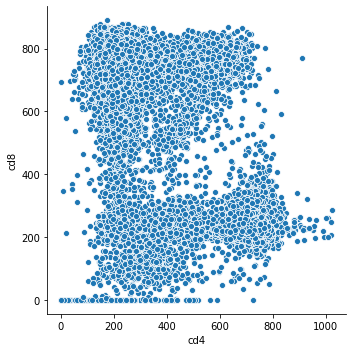

In [130]:
plottingDf = df.reset_index()
sns.relplot(data=plottingDf,kind='scatter',x='cd4',y='cd8')

Index reset within seaborn plotting command:

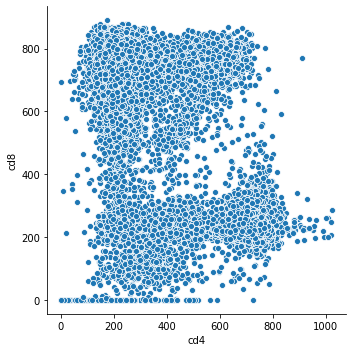

In [129]:
sns.relplot(data=df.reset_index(),kind='scatter',x='cd4',y='cd8')

The example above also shows some of the other components of a basic seaborn function call with relplot and catplot. The order of these components does not matter (for example I could put data as the last argument without causing problems) all that matters is that they are all there. 

* We assign the "data" keyword to our reset index dataframe
* We type in the *kind* of plot we want; I will write the possible types (and show examples of each) as I go through each category of plot. In this case we wanted a scatter plot
* We begin assigning parameters to parts of the plot. **catplot** and **relplot** need both an x and y argument, 1D plots only need a y argument, and 3D plots need all 3 (although some are inferred). Here is the full list of parameters you can vary for each type of plot. **x**,**y**, and **z** are self expkanatory. **hue** represents color variation, **style** represents marker type variation, **size** represents marker size variation. **row** represents different rows subplots; **col** represents different column subplots
    * 1D: **y**, hue, row, col
    * 1.5D (catplot): **x**, **y**, hue, row, col
    * 2D (relplot): **x**, **y**, hue, style, size, row, col
    * 3D: **x**, **y**, **z**, row, col
* We assign optional parameters dealing with figure style; not used in this plot. Here are the most important optional parameters that apply across all plot types; plot type specific styling parameters will be introduced in each plot type's section
    * **hue_order, style_order, row_order, col_order**: Can specify the order that the level values in the level passed to the (hue/style/row/col) parameters are plotted
    * **order**: Can specify order of x or y values in catplot (whichever axis is categorical)
    * **col_wrap**: can tell seaborn how many columns to plot before moving to the next row. Requires that the row argument is not passed with it
    * **sharex** = [False, 'row','col','all'], **sharey** = [False, 'row',' col',' all']:  here we tell seaborn how to share axes; across rows, across columns, across all subplots, or not at all
    * **palette**: here we can change the color palette used by seaborn. Look into matplotlib docs here for info on other color palettes available: https://matplotlib.org/tutorials/colors/colormaps.html   

There are also two important commands that are a bit different from the rest that control overall figure aesthetics:
* **height**,**aspect**: these two parameters control the height and width of the figure that seaborn generates. Useful if components of a plot seem like they are getting too crowded to read.
* sns.set_context(['notebook','paper','talk','poster']): this is a command that must be placed outside of the seaborn function call. It thickens the plots and scales up the sizes of the plot components to varying degrees, with "notebook" being the least scaled option (and the default) and "poster" being the most scaled option. It is definitely good to use this to change the appearance of your figure before using one in a presetnation, as the default notebook style is tough to read on a presentation screen. Keep in mind that any option besides notebook will cause issues with figure components overlapping, so you will likely need to play with the **height** and **aspect** parameters of the figure to make sure everything fits well. I recommend changing aspect first, and only changing height as a last resort. An aspect of 1.2 (instead of the default 1) usually works well with figures in a talk context.  

Below, I show how the last two parameters are used. 

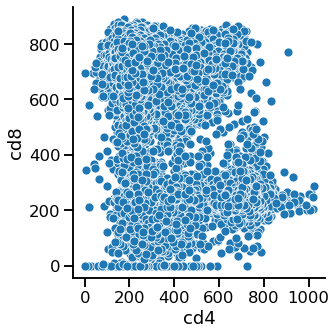

In [205]:
sns.set_context('talk')
sns.relplot(data=df.reset_index(),kind='scatter',x='cd4',y='cd8')
sns.set_context('notebook')

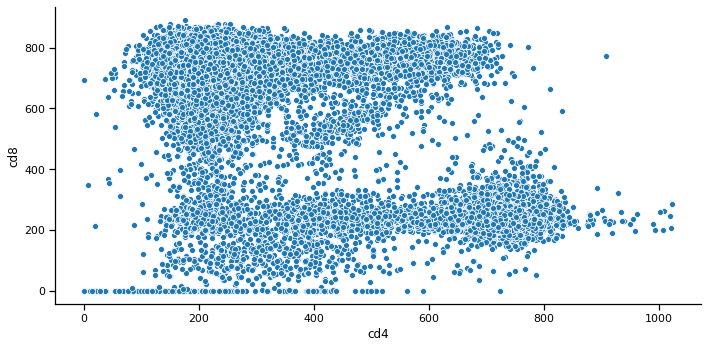

In [203]:
sns.relplot(data=df.reset_index(),kind='scatter',x='cd4',y='cd8',aspect=2)

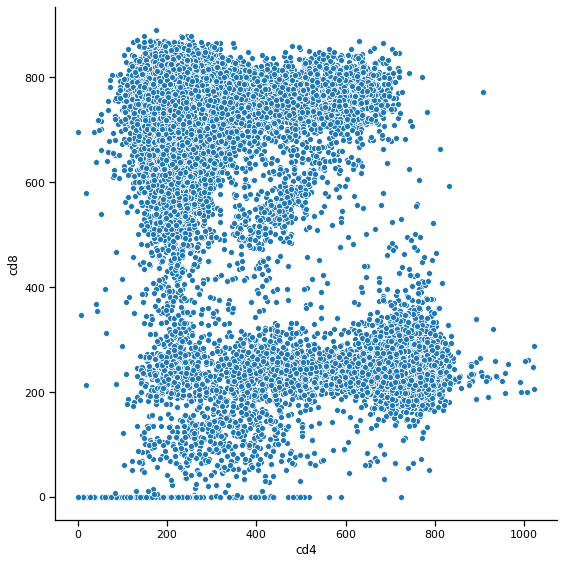

In [209]:
sns.relplot(data=df.reset_index(),kind='scatter',x='cd4',y='cd8',height=8)

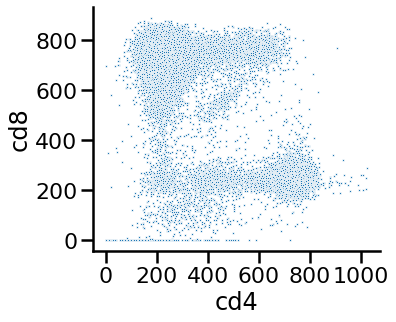

In [214]:
sns.set_context('poster')
#I also controll the scatter plot marker size here with s, so that the set_context() function only applies to the axes
sns.relplot(data=df.reset_index(),kind='scatter',x='cd4',y='cd8',aspect=1.2,s=5)
sns.set_context('notebook')


## Catplot (1.5D): kind = point, bar, violin, boxplot, strip, swarm

Documentation: https://seaborn.pydata.org/generated/seaborn.catplot.html

Catplots are used to plot data in plots that have a numeric axis and a categorical axis. They are good for showing distributions of data. Seaborn documentation is very good for this function, so I will restrict notebook to showing examples of use cases and describing common optional parameters. Refer to the documentation above first if you have questions. 

### Common Optional Parameters used in following examples
* **ci**: if **ci** is set equal to 'sd', seaborn calculates the standard deviation of samples per grouping and displays it, When ci is equal to a number x, seaborn computes a x% confidence interval using botstrappiing and displays that around your average. When equal to none, it displays no error bars. Is equal to 'sd' by default
* **dodge**: staggers hue level values so that they don't overlap per x level value
* **jitter**: Prevents random noise (in the x direction) addition to strip plots that makes individual values stand out a bit more
* **s**: Changes size of all points; smaller point sizes are usually good when displaying many at once
* **split**: Compares violin plots side by side across hue variable. Must only have two level values in the hue level. 
* **errwidth**: changes the width of the error bar (1 usually looks good)
* **capsize**: changes the size of the error bar cap (0.05 usually looks good)
* **join**: Can connect or not connect points in pointplot

### Examples:
#### Bar:

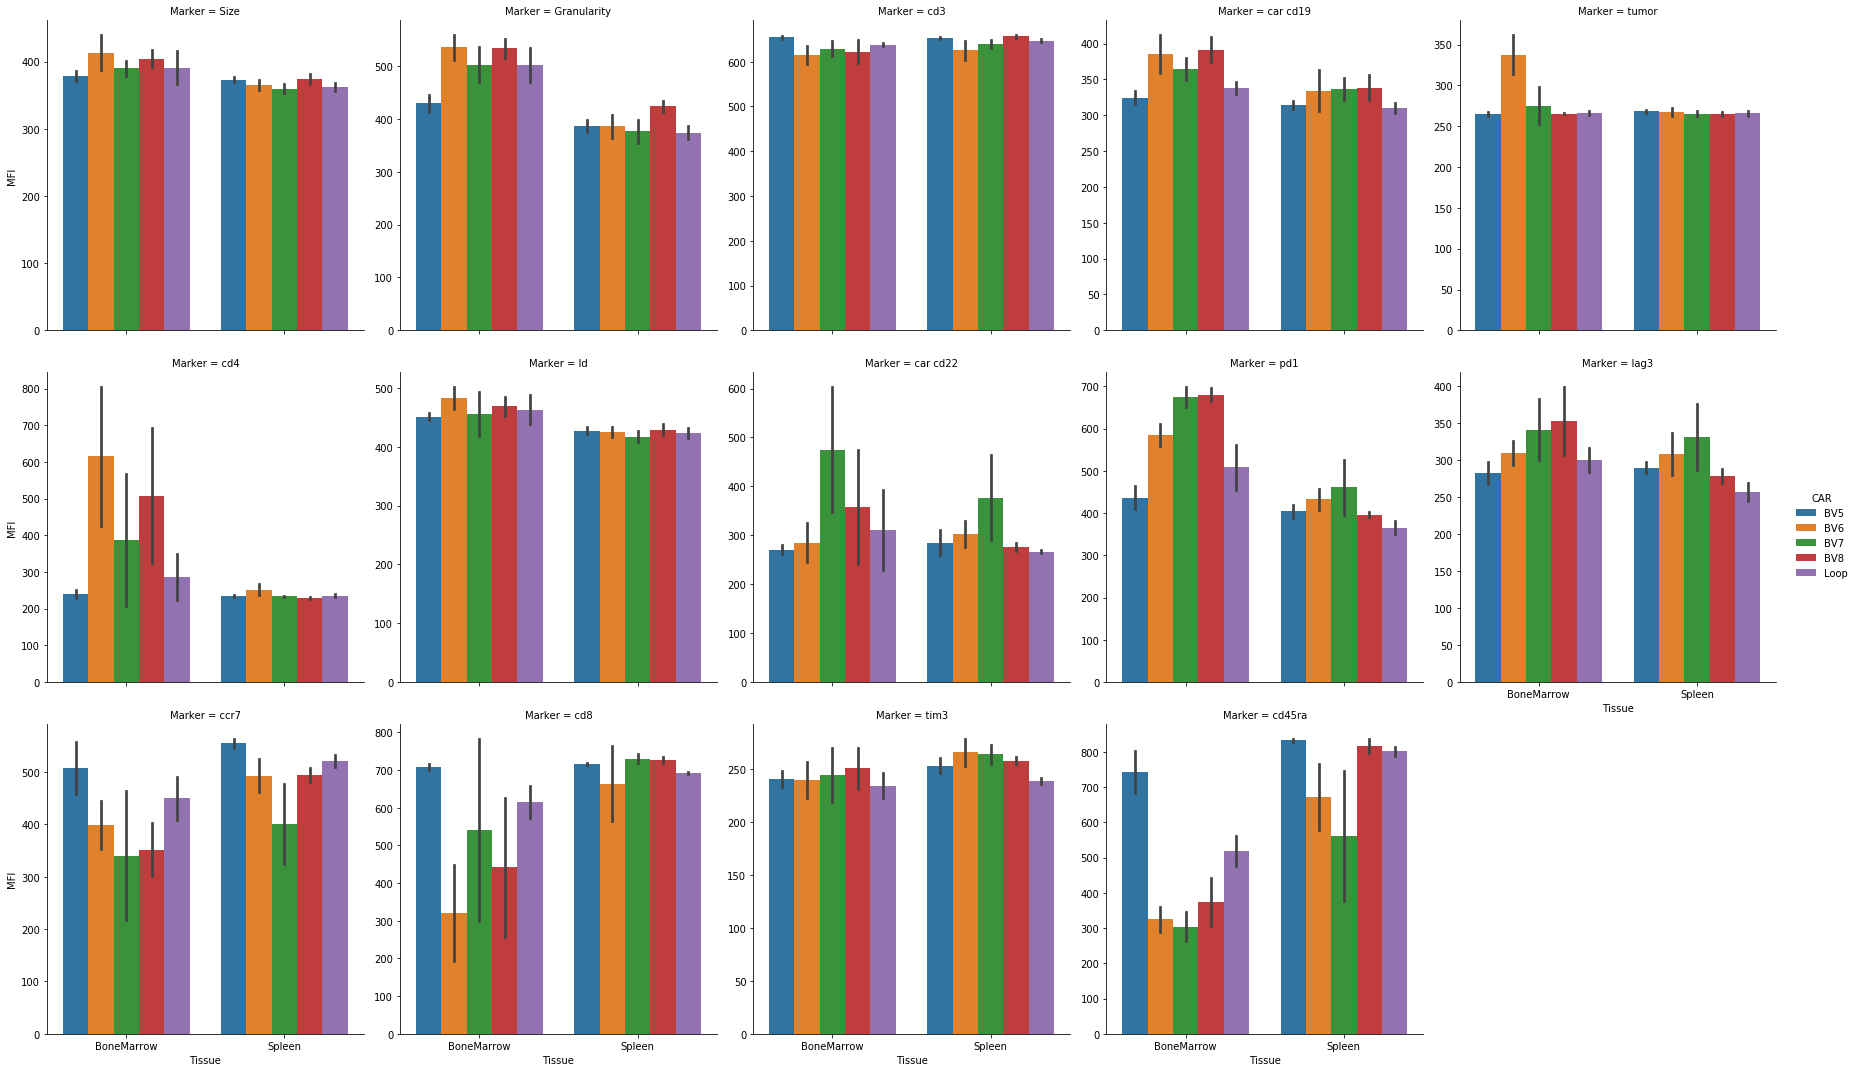

In [136]:
groupedDf = df.groupby(list(df.index.names)[:-1]).median()
plottingDf = groupedDf.stack().to_frame('MFI').reset_index()
sns.catplot(data=plottingDf,kind='bar',x='Tissue',y='MFI',hue='CAR',col='Marker',col_wrap=5,sharey=False,ci='sd')

#### Strip:

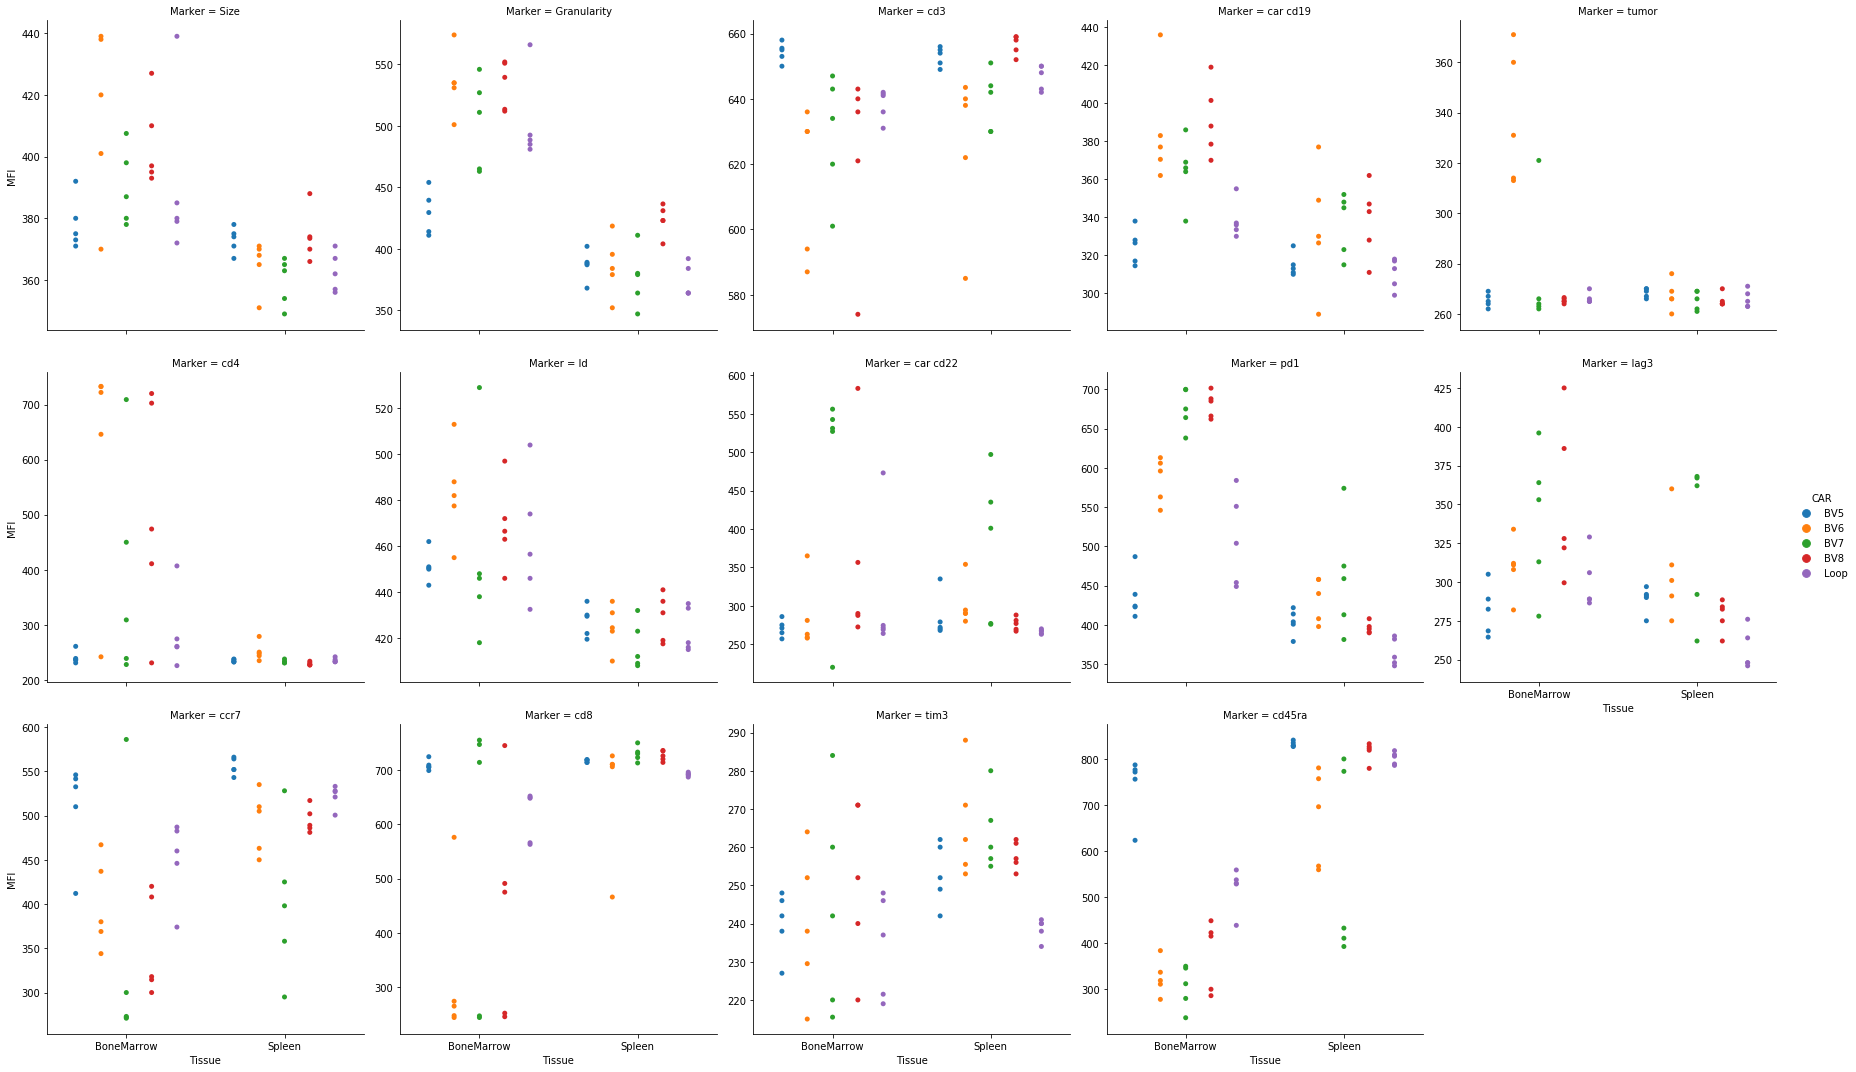

In [187]:
groupedDf = df.groupby(list(df.index.names)[:-1]).median()
plottingDf = groupedDf.stack().to_frame('MFI').reset_index()
sns.catplot(data=plottingDf,kind='strip',x='Tissue',y='MFI',hue='CAR',col='Marker',col_wrap=5,sharey=False,dodge=True,jitter=False)

#### Box:

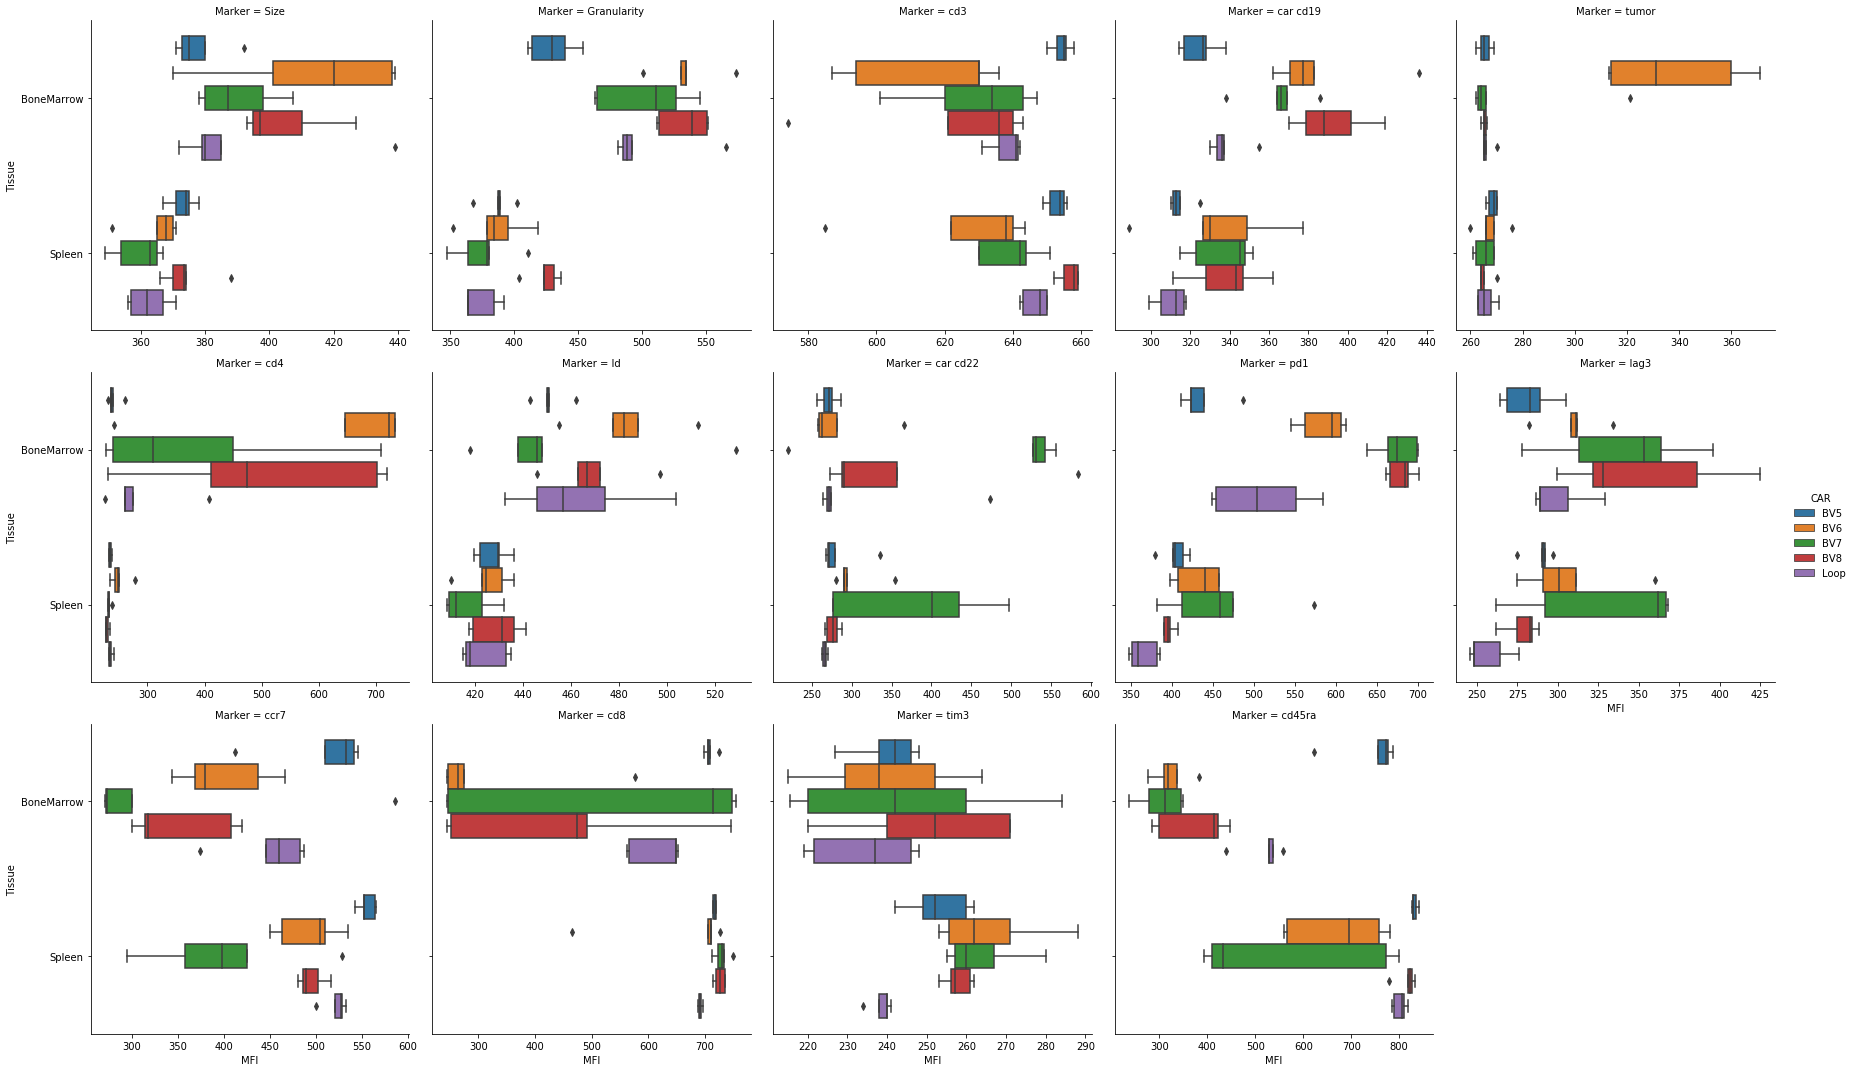

In [185]:
groupedDf = df.groupby(list(df.index.names)[:-1]).median()
plottingDf = groupedDf.stack().to_frame('MFI').reset_index()
sns.catplot(data=plottingDf,kind='box',y='Tissue',x='MFI',hue='CAR',col='Marker',col_wrap=5,sharex=False,dodge=True)

#### Swarm:

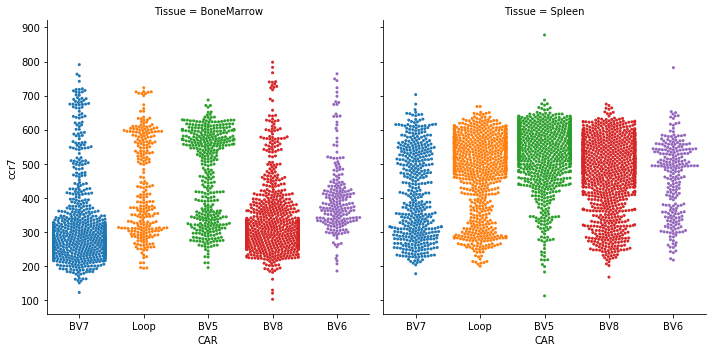

In [154]:
plottingDf = df.sample(frac=0.1).reset_index()
sns.catplot(data=plottingDf,kind='swarm',y='ccr7',x='CAR',s=3,col='Tissue')

#### Violin: 

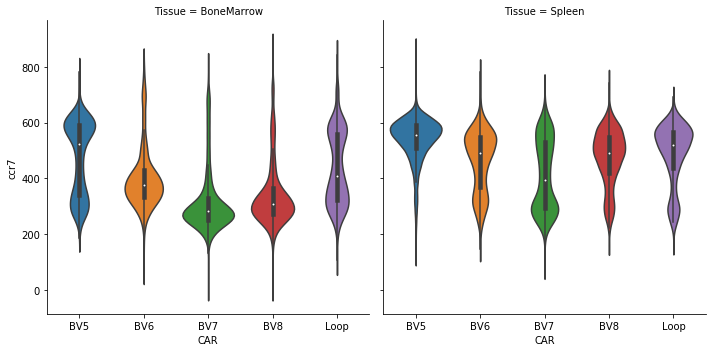

In [160]:
plottingDf = df.reset_index()
sns.catplot(data=plottingDf,kind='violin',y='ccr7',x='CAR',col='Tissue')

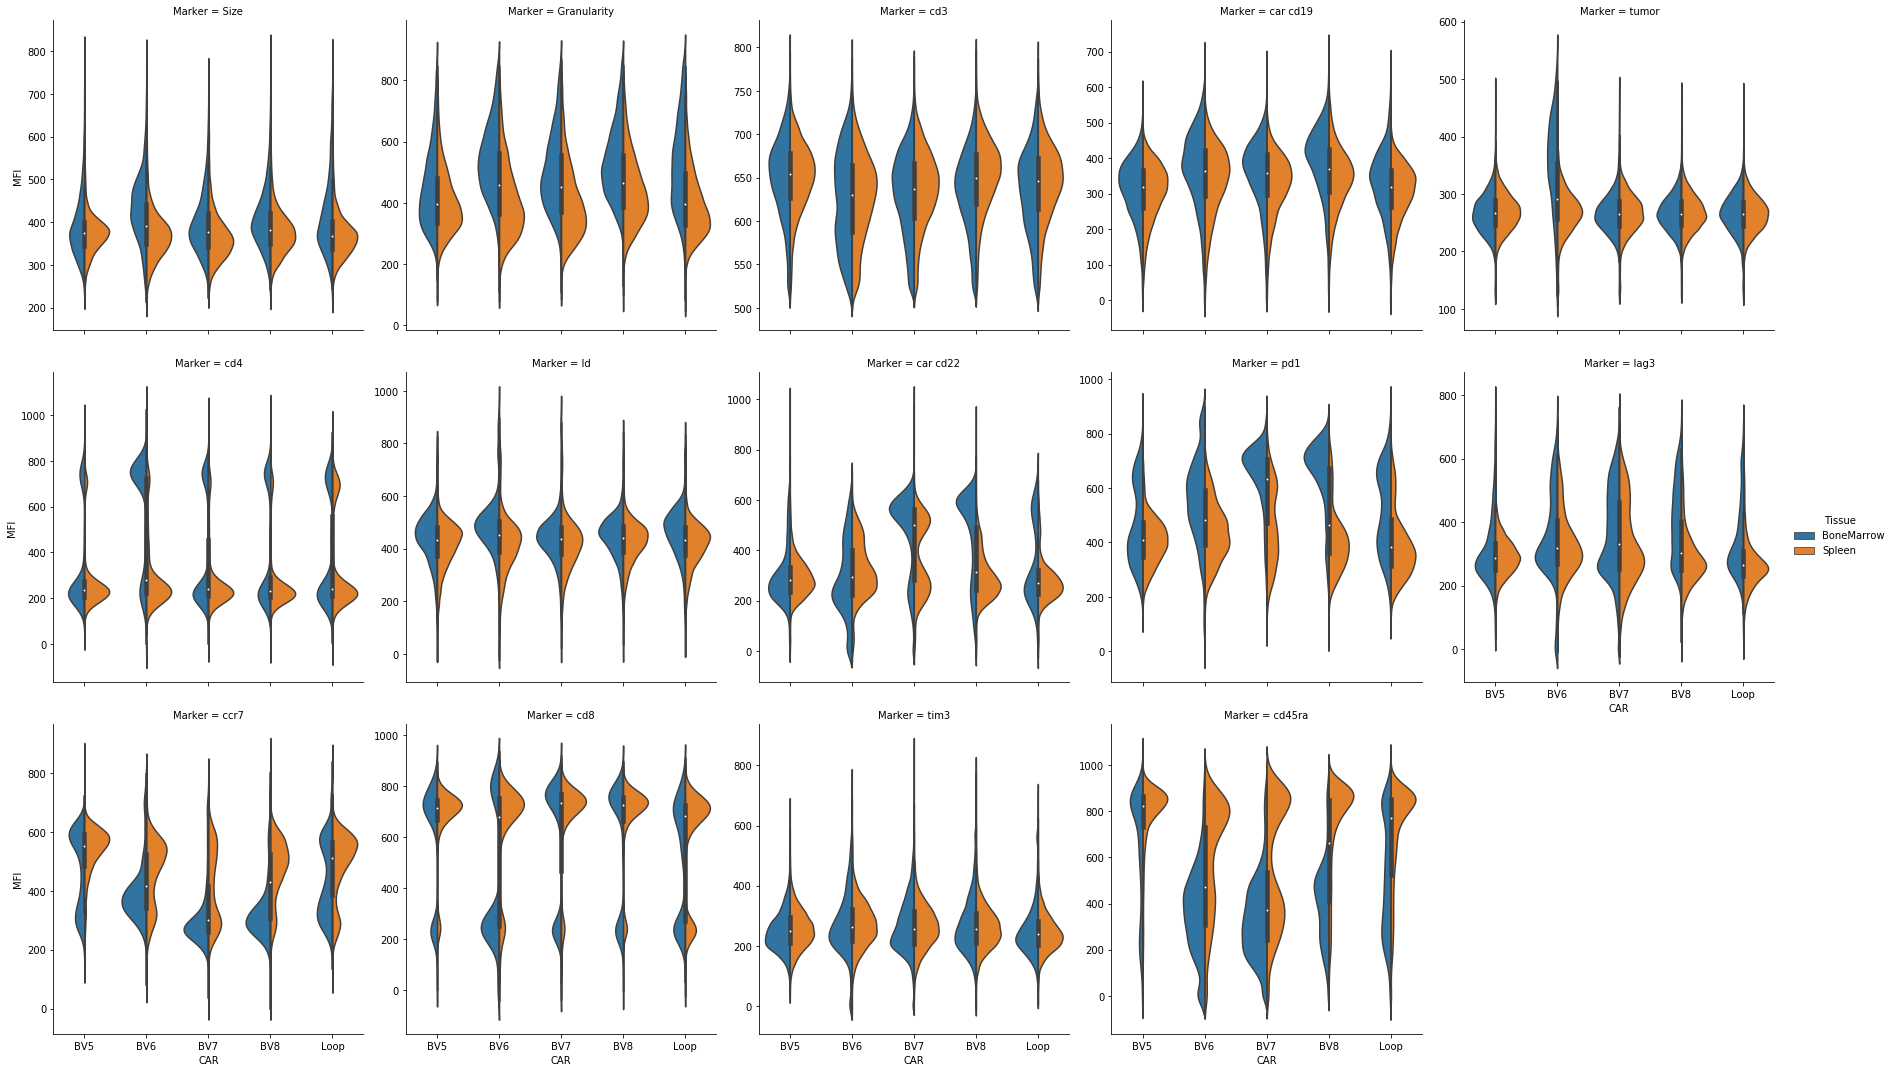

In [166]:
plottingDf = df.stack().to_frame('MFI').reset_index()
sns.catplot(data=plottingDf,kind='violin',y='MFI',x='CAR',col='Marker',col_wrap=5,hue='Tissue',split=True,sharey=False)

#### Point:

In [189]:
df2 = pd.read_pickle('clusterFrequencyDf-Ira-spleen.pkl')
df2

Cluster                                               0          1          2  \
CellType   Tissue GULO_Phenotype Sample Time                                    
Live cells Spleen High           1      72.0  14.823915  18.318318   4.750205   
                                 2      72.0  16.561766  17.407233   6.510099   
                                 3      72.0  16.855524  13.852691   7.847025   
                                 4      72.0  13.714286  17.238095   3.057143   
                  Low            1      72.0   7.019419   4.721183  11.633707   
                                 2      72.0   7.872160   4.035071  15.329499   
                                 3      72.0   8.055582   5.163834  15.998498   
                                 4      72.0   9.222846   4.953184  14.625468   
                  WT             1      72.0  13.911588  18.578320   3.554199   

Cluster                                               3          4          5  \
CellType   Tissue GULO_Phenotype Sample Time                                    
Live cells Spleen High           1      72.0   5.364455   6.797707   1.146601   
                                 2      72.0   4.734617   7.120714   2.301550   
                                 3      72.0   3.597734   8.253069   2.776204   
                                 4      72.0   6.571429  11.200000   0.485714   
                  Low            1      72.0  11.215037   3.972920  11.286300   
                                 2      72.0  13.491091   4.553597   9.974545   
                                 3      72.0  11.623322   3.793071  10.233781   
                                 4      72.0  11.039326   3.604869  10.496255   
                  WT             1      72.0   6.586591  11.558531   0.255981   

Cluster                                              6         7         8  \
CellType   Tissue GULO_Phenotype Sample Time                                 
Live cells Spleen High           1      72.0  4.026754  6.538357  6.087906   
                                 2      72.0  5.392203  6.434946  6.312823   
                                 3      72.0  4.050992  6.902738  7.327668   
                                 4      72.0  1.485714  5.114286  3.571429   
                  Low            1      72.0  9.887761  3.821486  5.032959   
                                 2      72.0  6.599415  4.195343  4.336759   
                                 3      72.0  7.407755  5.389165  5.323444   
                                 4      72.0  7.368914  4.260300  4.559925   
                  WT             1      72.0  1.053461  5.080240  3.091464   

Cluster                                              9  ...        19  \
CellType   Tissue GULO_Phenotype Sample Time            ...             
Live cells Spleen High           1      72.0  1.119301  ...  0.696151   
                                 2      72.0  2.038516  ...  0.742132   
                                 3      72.0  1.983003  ...  1.057602   
                                 4      72.0  0.390476  ...  1.761905   
                  Low            1      72.0  8.845537  ...  0.935329   
                                 2      72.0  7.711888  ...  1.235033   
                                 3      72.0  6.121491  ...  1.004601   
                                 4      72.0  9.466292  ...  1.095506   
                  WT             1      72.0  0.374126  ...  1.102688   

Cluster                                             20        21        22  \
CellType   Tissue GULO_Phenotype Sample Time                                 
Live cells Spleen High           1      72.0  1.187551  0.382200  1.037401   
                                 2      72.0  0.845467  0.676374  0.704556   
                                 3      72.0  0.991501  1.095373  0.840415   
                                 4      72.0  1.628571  0.647619  1.009524   
                  Low            1      72.0  0.498842  0.997684  0.561197   
       

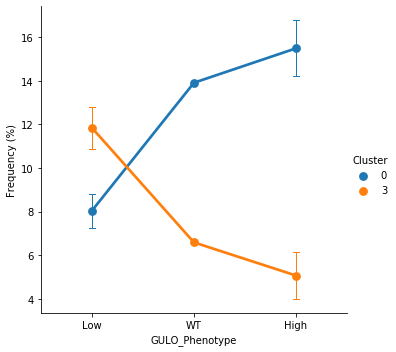

In [188]:
tempdf = df2.loc[:,['0','3']].stack().to_frame('Frequency (%)')
plottingDf = tempdf.reset_index()
sns.catplot(data=plottingDf,kind='point',x='GULO_Phenotype',y='Frequency (%)',order=['Low','WT','High'],hue='Cluster',sharey=False,ci='sd',errwidth=1,capsize=0.05)

## Relplot (2D): kind = scatter, line

Documentation: https://seaborn.pydata.org/generated/seaborn.relplot.html

Relplots are used to plot data in plots that have two numeric axes. Seaborn documentation is very good for this function, so I will restrict notebook to showing examples of use cases and describing common optional parameters. Refer to the documentation above first if you have questions.  

### Common Optional Parameters used in following examples
* **facet_kws**={'sharex':[True,'row','col',False],'sharey':[True,row,col,False]}: works just like catplot sharex/sharey, but needs to be used as part of a dictionary with **facet_kws** in relplot for some reason
* **marker**: can be used to put a single marker at each x/y value in a lineplot

### Examples
#### scatter:

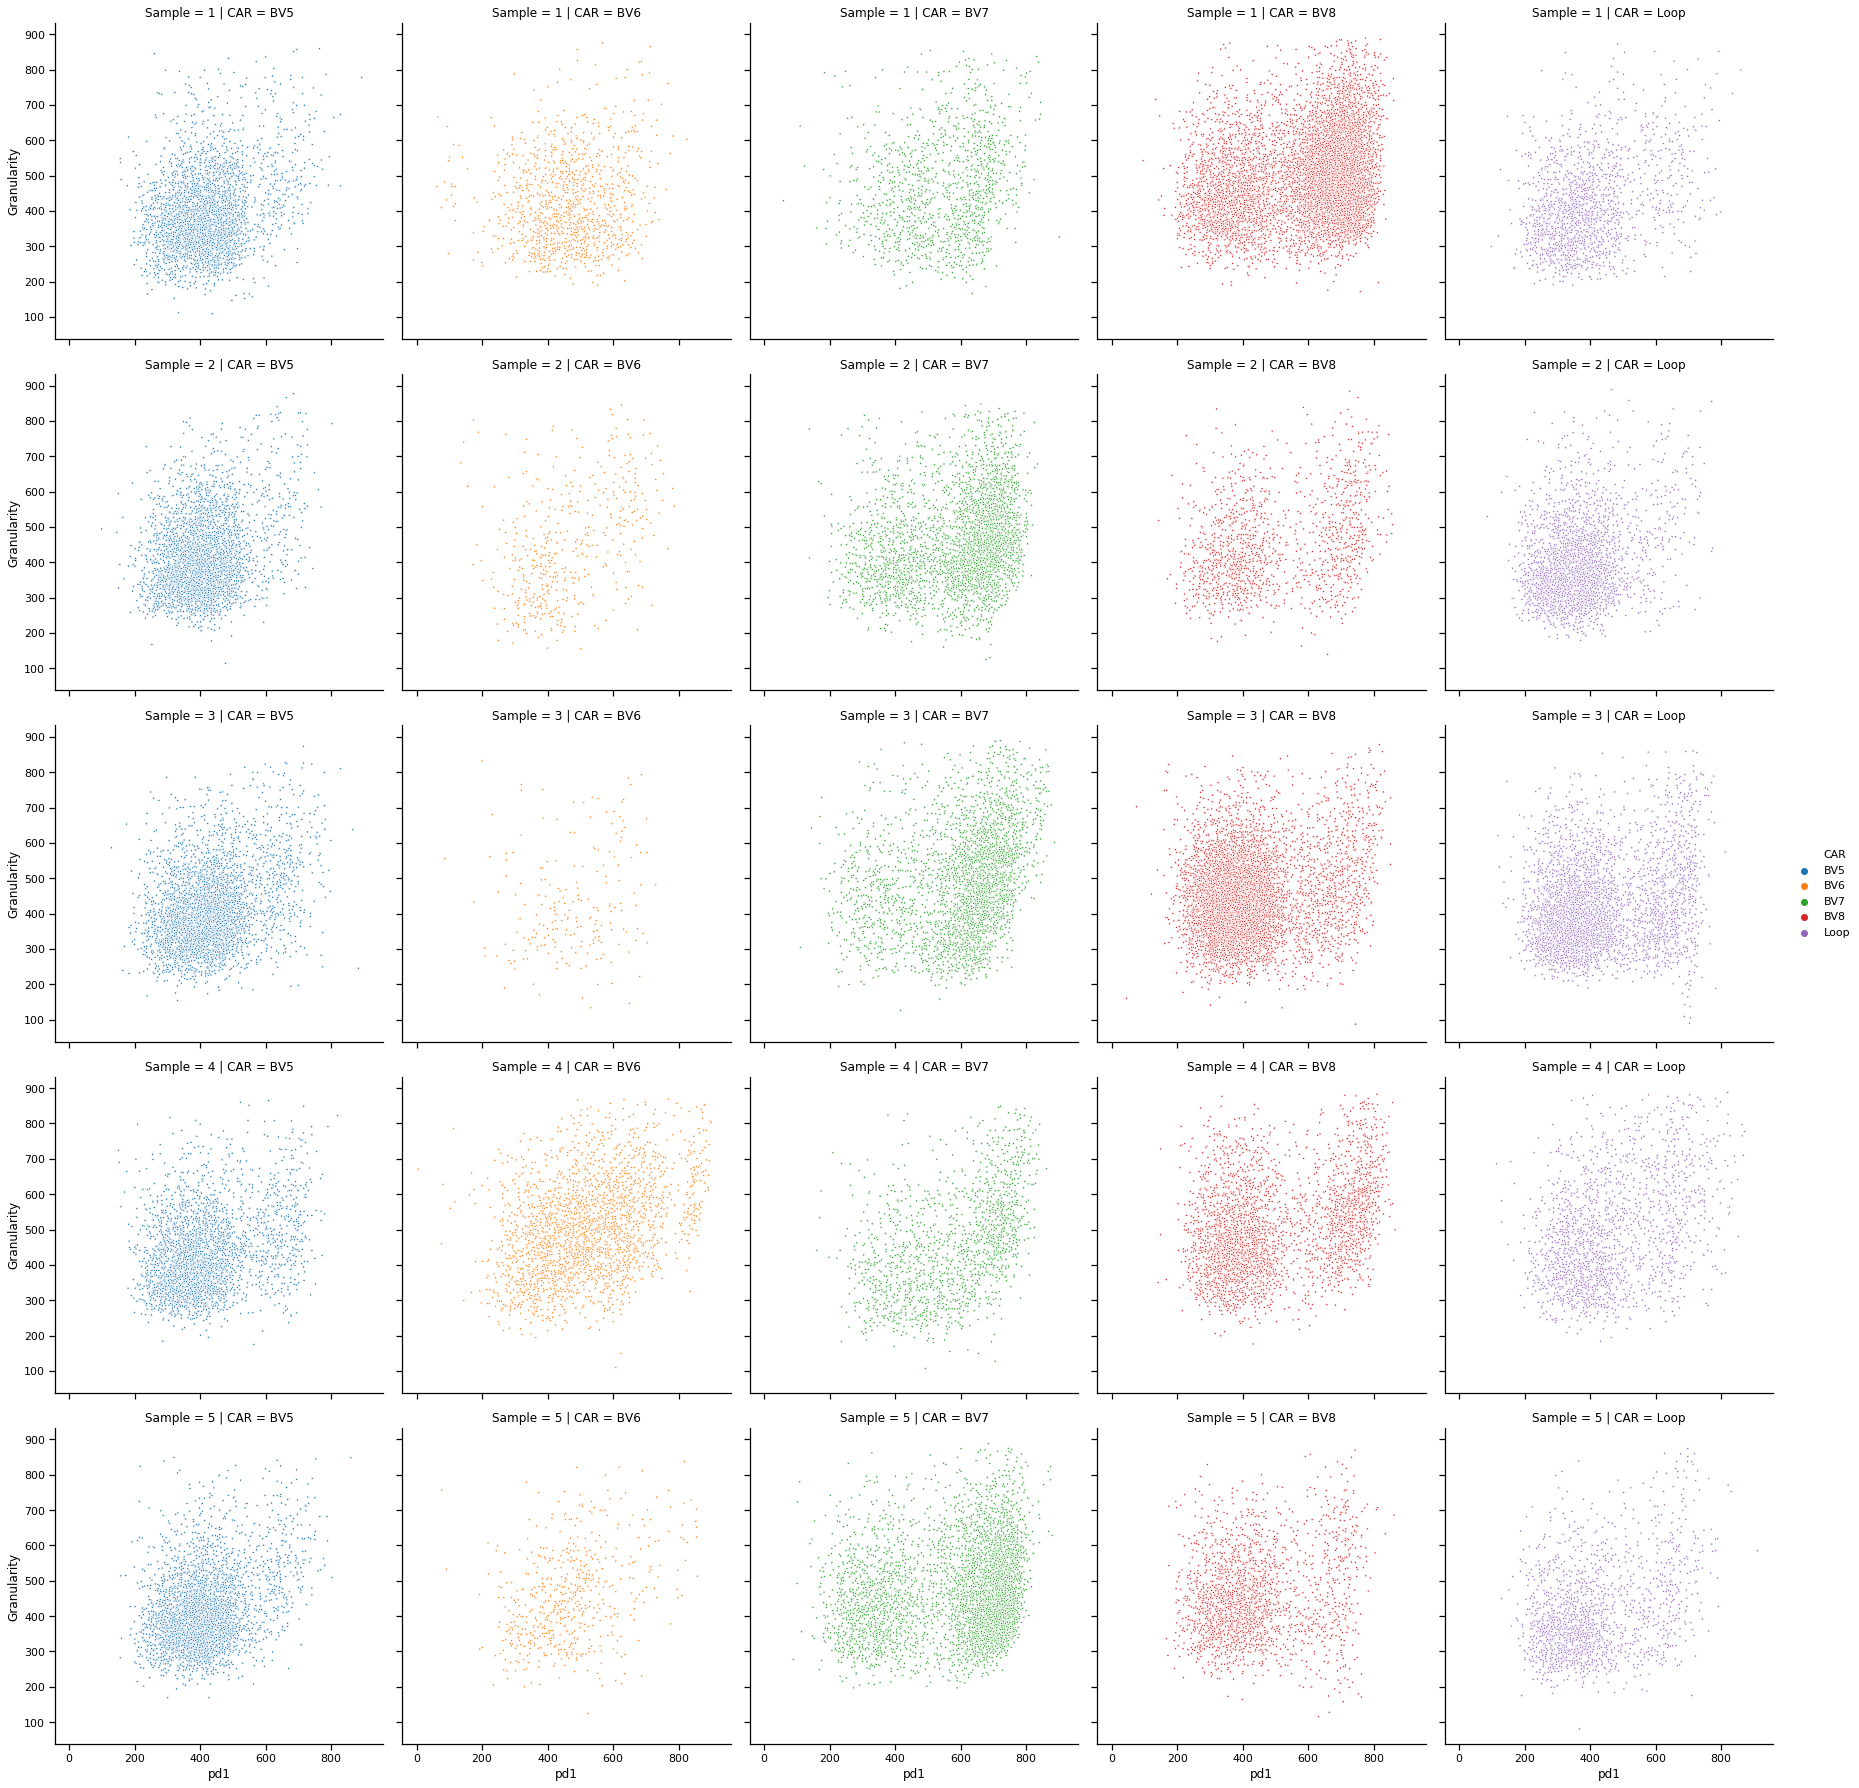

In [217]:
plottingDf = df.reset_index()
sns.relplot(data=plottingDf,x='pd1',y='Granularity',hue='CAR',col='CAR',row='Sample',s=5)

Here we color the scatter plot by a numeric variable instead of a categorical variable; *CCR7*, another surface marker:

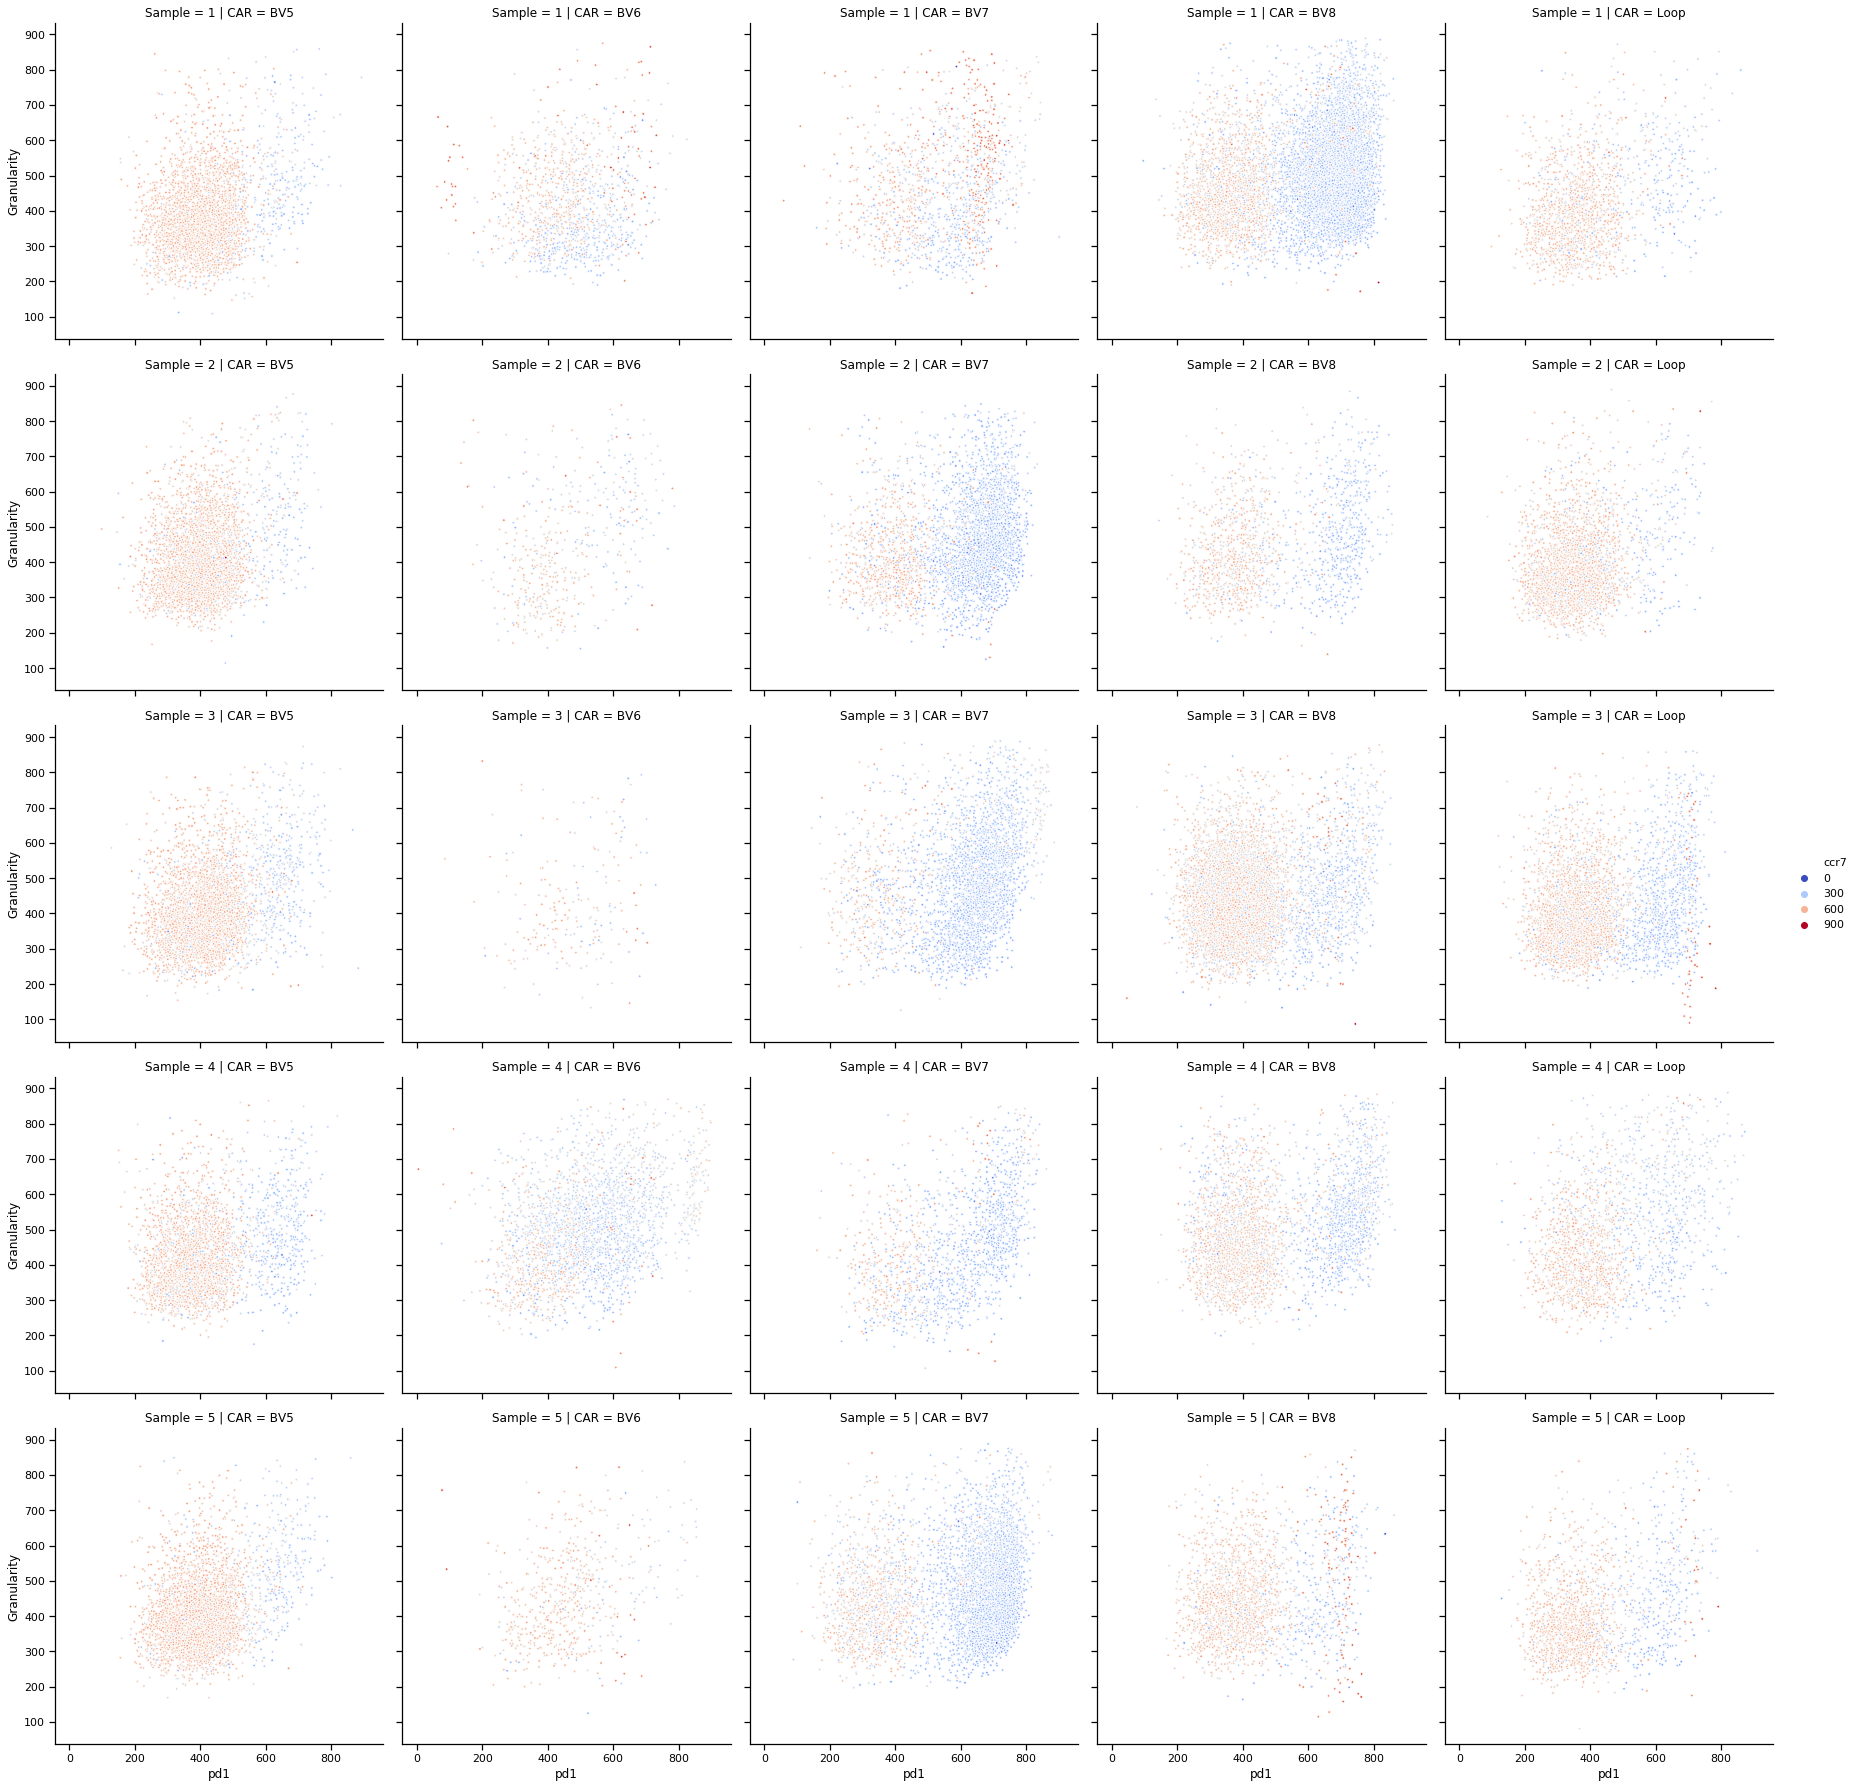

In [314]:
plottingDf = df.reset_index()
sns.relplot(data=plottingDf,x='pd1',y='Granularity',hue='ccr7',col='CAR',row='Sample',palette='coolwarm',s=7)

#### line:

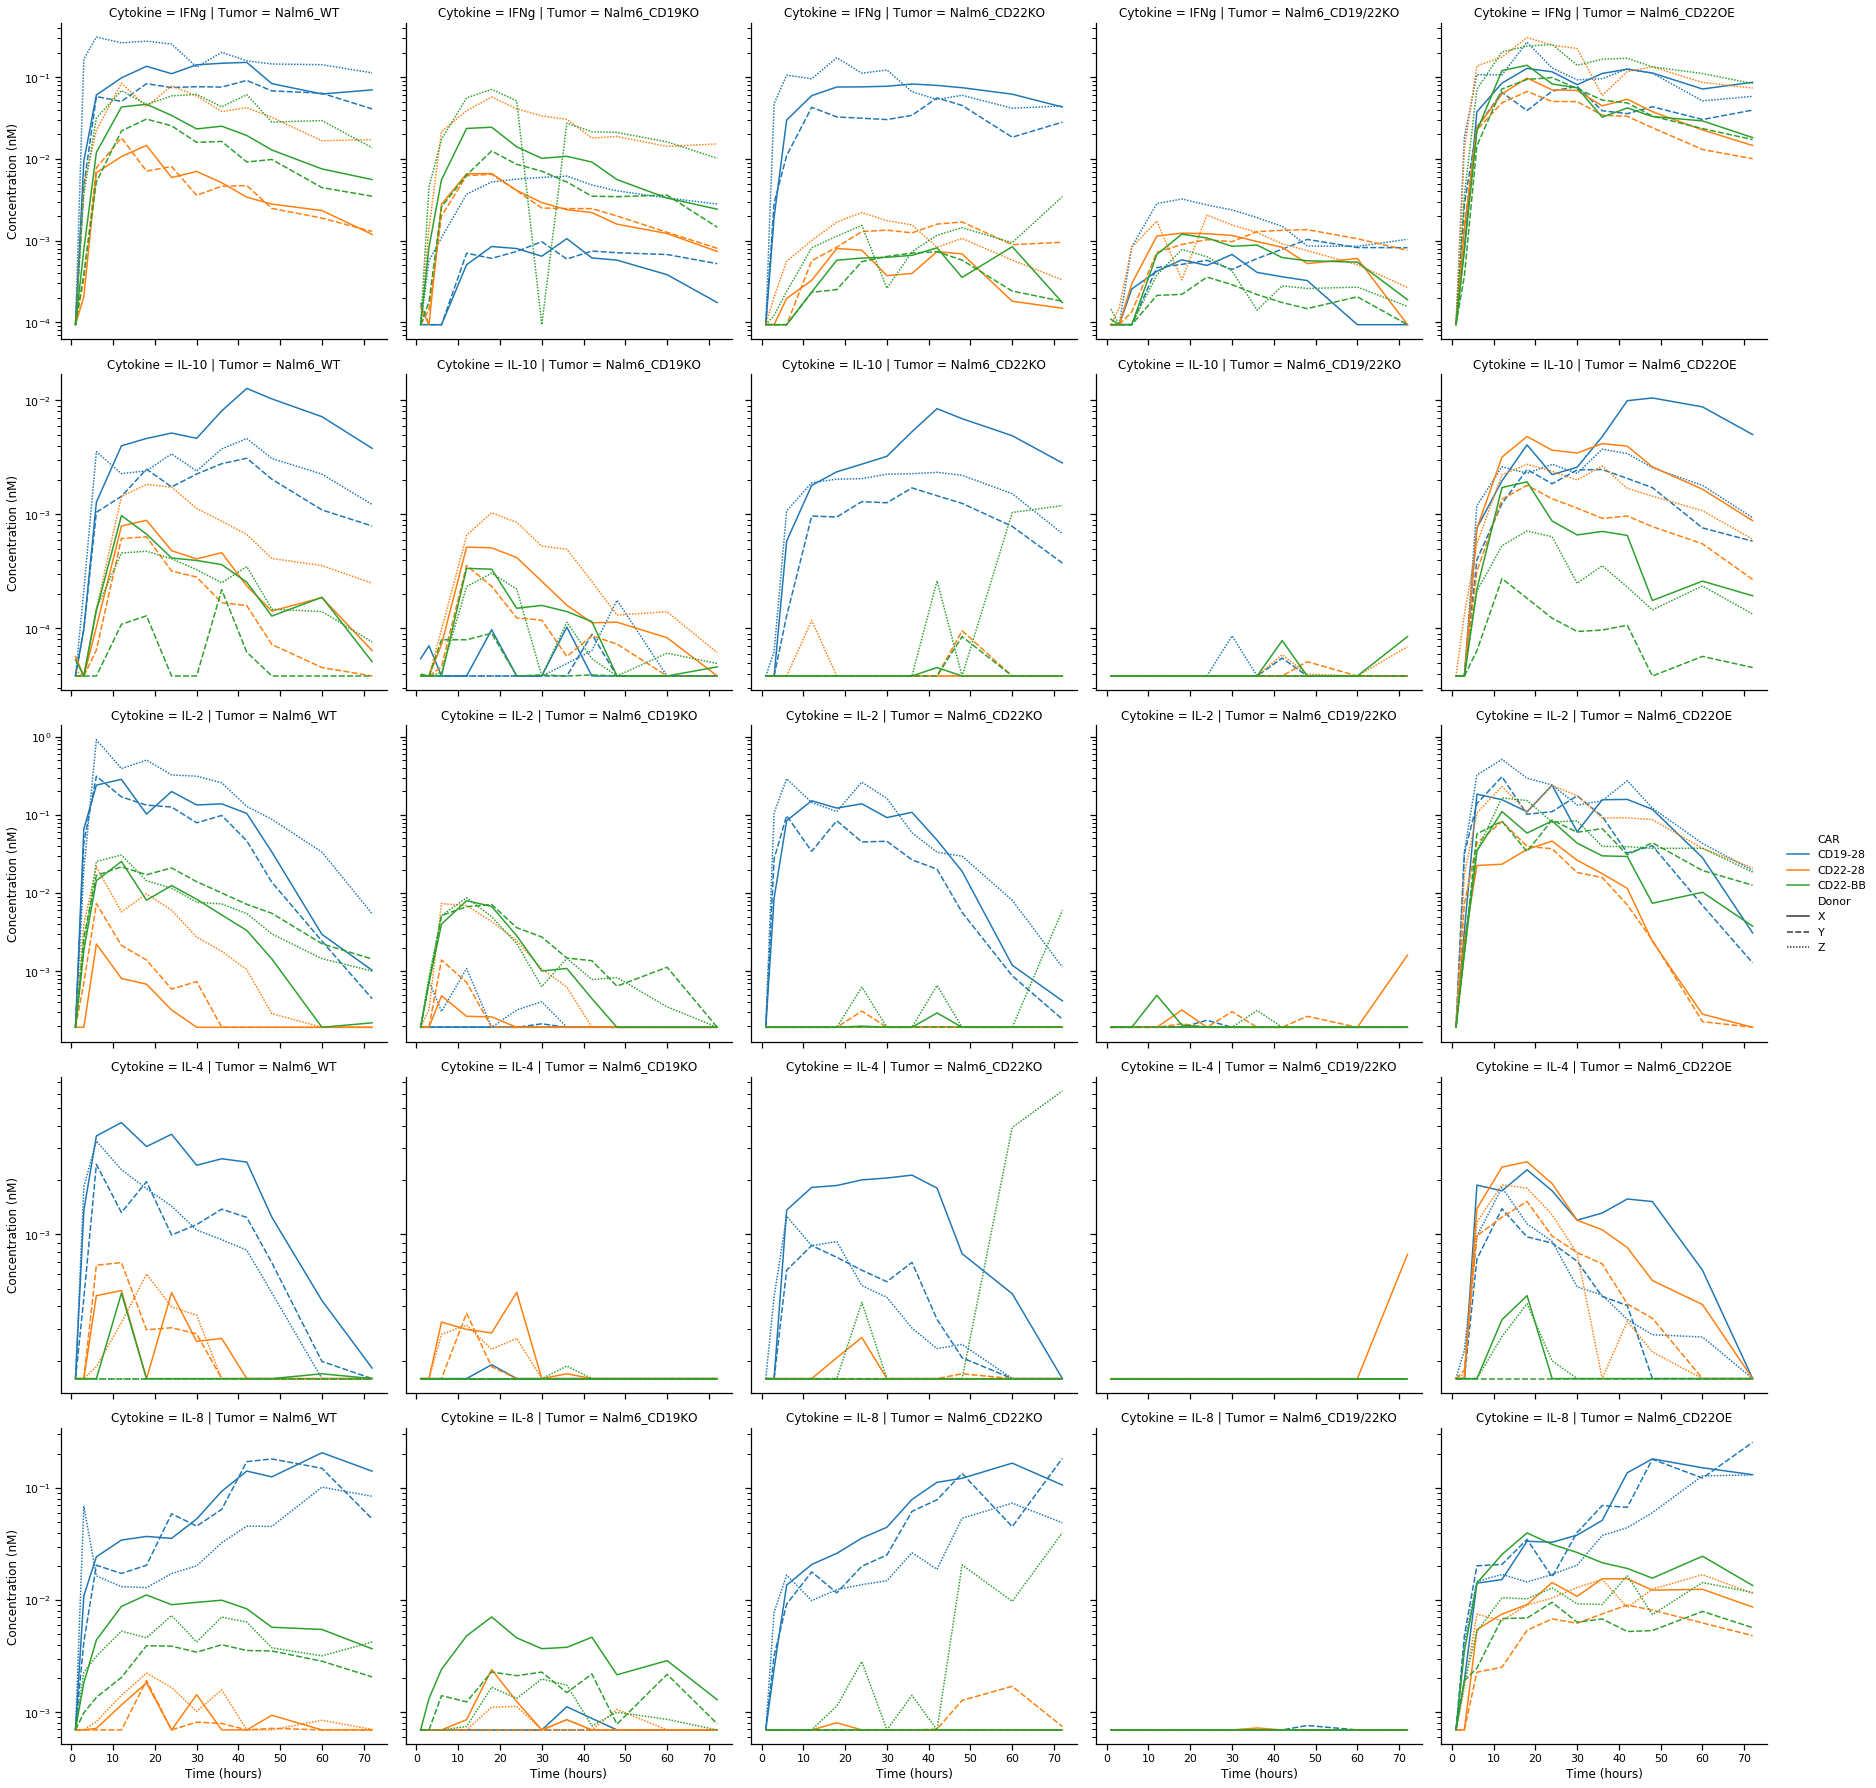

In [236]:
#Will use another dataset more suited for showing a lineplot here:
df3 = pd.read_pickle('cytokineConcentrationPickleFile-20200309-Human-CAR-T_4-modified.pkl')
#Grab only a selection of cytokines
tempdf = df3.loc[['IL-2','IFNg','IL-8','IL-4','IL-10'],:].stack().to_frame('Concentration (nM)')
#Put units on time axis
oldNames = list(tempdf.index.names)
newNames = ['Time (hours)' if x=='Time' else x for x in oldNames]
tempdf.index.names = newNames
fullPlottingDf = tempdf.reset_index()
#Grab only a selection of CARs
plottingDf = fullPlottingDf[fullPlottingDf['CAR'].isin(['CD19-28','CD22-28','CD22-BB'])]
fg = sns.relplot(data=plottingDf,kind='line',x='Time (hours)',y='Concentration (nM)',row='Cytokine',hue='CAR',col='Tumor',style='Donor',facet_kws={'sharey':'row'})
#Sets y axis scale of entire figure to log10
fg.set(yscale='log')

## KDE plots/histograms (1D)

Documentation: 
* https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
* https://seaborn.pydata.org/generated/seaborn.kdeplot.html
* https://seaborn.pydata.org/generated/seaborn.distplot.html

1D plots don't have the all-in-one functions that 1.5D and 2D plots did with catplot and relplot respectively, but you can control them very similarly with just one extra step. Seaborn has a built in kdeplot (for smooth probability density estimates of distributions) and distplot (for binned histograms) functions which only work on a single axis (cannot produce multiple subplots). By binding them to a seaborn **FacetGrid** object however, we can use the same row/col nomenclature we've been using for relplots and catplots. 

The biggest issue with these functions is that the kdeplot function doesn't have a way to have counts (instead of probabilities) on the y axis. You can correct for this, but it's complicated. This is the one plot type I would recommend using my GUI all the time for, as it does the correction automatically (also fixes the scale of the MFI). Relplot/catplot are easy enough to use that it's fine to use them manually, but kdeplot is tricky to get right without my GUI.

### Common Optional Parameters used in following examples
* **shade**=[True,False]: controls shading inside of kdeplot
* **bw**: set equal to a number. Controls bandwidth of kdeplot, which is basically a measure of its smoothness. Higher bandwidth means more smooth plots and vice versa
* **bins**: number of equally spaced bins to use in a distplot histogram. Should basically always be equal to 256 on a single cell histogram, as that is what's used in FlowJo
* **kde**=[True,False]: in a distplot, controls whether kde is plotted on top of distribution  

### Examples:
#### KDE plot

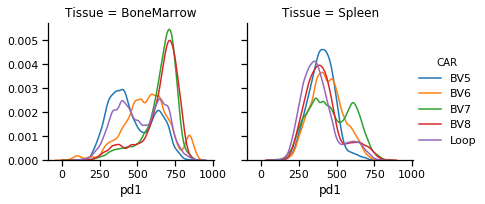

In [248]:
plottingDf = df.reset_index()
#This is where you put all of the parameters (hue,row,col) you are used to varying
fg = sns.FacetGrid(data=plottingDf,legend_out=True,hue='CAR',col='Tissue')
#This is where you put the type of plot and the arguments specific to the plot type, as well as the variable you are plotting on the numeric axis (pd1 in this case)
fg.map(sns.kdeplot,'pd1',bw=15,shade=False)
fg.add_legend()

#### Histogram

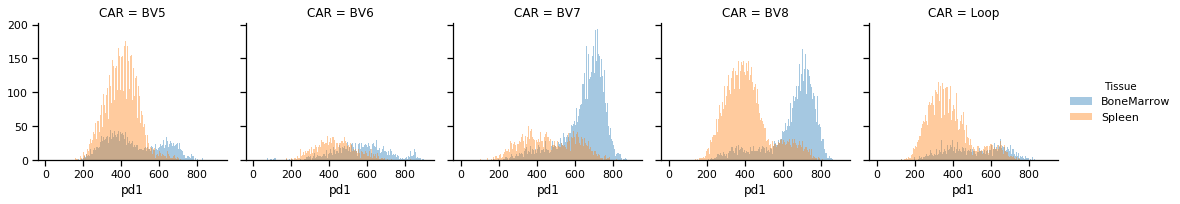

In [247]:
plottingDf = df.reset_index()
#This is where you put all of the parameters (hue,row,col) you are used to varying
fg = sns.FacetGrid(data=plottingDf,legend_out=True,hue='Tissue',col='CAR')
#This is where you put the type of plot and the arguments specific to the plot type, as well as the variable you are plotting on the numeric axis (pd1 in this case)
fg.map(sns.distplot,'pd1',bins=256,kde=False)
fg.add_legend()

## Heatmaps/Clustermaps (3D)

Documentation: 
* https://seaborn.pydata.org/generated/seaborn.heatmap.html
* https://seaborn.pydata.org/generated/seaborn.clustermap.html

Heatmaps and clustermaps are the same, except clustermaps perform hirerachical clustering on their rows or dataframes to cluster samples on its heatmap. Can be useful to see patterns in the data.

Again unlike relplots/catplots, there's no all in one function for 3d plots. It's possible to put them into a facet grid like I do with kdeplots but it can be tricky to get things formatted correctly, so I recommend just making a separate figure for each heatmap/dendrogram you make. Their syntax is very easy however.  

**IMPORTANT NOTE:** These are the only plot types in seaborn that you **do not** need to reset your dataframe index for. The columns of the dataframe will always be the columns of the heatmap/clustermap, and the rows of the dataframe will always be the rows of the heatmap/clustermap, so you should rearrange your plotting dataframe keeping that in mind before passing it to heatmap or clustermap. 

The major issue with these plots is that their labels look very bad and hard to read with multiIndex plots. This is the other plot type where using my GUI is probably your best bet, as it formats multiIndex heatmaps labels more nicely. 

### Common Optional Parameters used in following examples
* **Square**=[True,False]: makes all spaces in a heatmap square
* **cmap**: equivalent of **palette** command from earlier plot types. Sets color scale for the plot
* **cbar_kws**: should be set equal to a dictionary which sends its arguments to the colorbar. Most common thing to put in here is title to set the colorbar title
* **figsize=(width,height)**: set figure width and height
* **standard_scale**: Can either be left blank (no standardization) be set to 0 (standardize each row) or 1 (standardize each column)

### Examples:
#### Heatmap
Note the structure of the dataframe that is put into the heatmap function:

CAR       BV5    BV6    BV7    BV8   Loop
Sample                                   
1       564.0  450.0  398.0  481.0  527.0
2       552.0  505.0  528.0  489.0  533.0
3       552.0  510.0  295.0  486.0  500.5
4       543.0  463.0  358.0  502.0  521.0
5       566.0  535.0  425.0  517.0  528.0

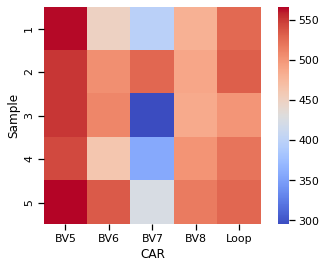

In [312]:
groupedDf = df.groupby(list(df.index.names)[:-1]).median()
plottingDf = groupedDf.loc[idx[:,'Spleen'],'ccr7'].unstack('CAR')
plottingDf = plottingDf.droplevel(['Time','CellType','Tissue'],axis=0)
sns.heatmap(data=plottingDf,square=True,cmap='coolwarm')
plottingDf

#### Clustermap
Clustermap with each sample separate and with standard scaling (each marker is normalized separately):

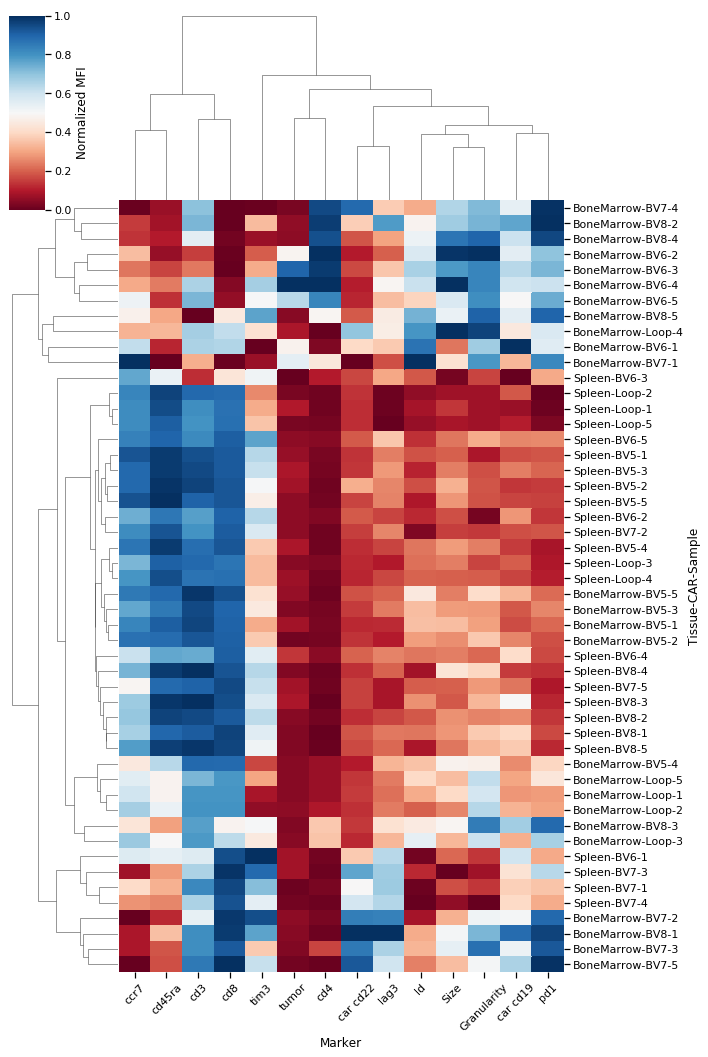

In [305]:
groupedDf = df.groupby(list(df.index.names)[:-1]).median().droplevel(['Time','CellType'],axis=0)
cg = sns.clustermap(data=groupedDf,cmap='RdBu',figsize=(10,15),cbar_kws={'label':'Normalized MFI'},standard_scale=1)
#Rotates x axis labels 45 degrees to make them easier to read
a = plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)

Clustermaps with samples averaged but no scaling per marker (standard scaling): 

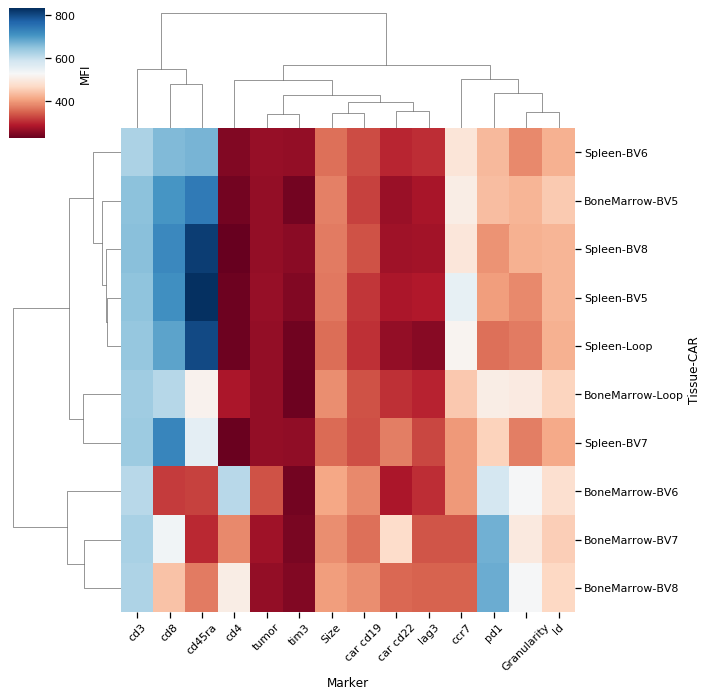

In [310]:
groupedDf = df.groupby(list(df.index.names)[:-1]).median().droplevel(['Time','CellType'],axis=0)
groupedDf = groupedDf.groupby(list(groupedDf.index.names)[:-1]).mean()
cg = sns.clustermap(data=groupedDf,cmap='RdBu',cbar_kws={'label':'MFI'})
a = plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)

## Saving Figures:
To save a seaborn figure in a notebook, you can either right click it and press save, or save it within the notebook itself as demonstrated here. The "bbox_inches='tight'" command simply minimizes white space.  
I save both a pdf and a png; the pdf is higher quality but takes longer to save.

In [316]:
groupedDf = df.groupby(list(df.index.names)[:-1]).median().droplevel(['Time','CellType'],axis=0)
groupedDf = groupedDf.groupby(list(groupedDf.index.names)[:-1]).mean()
cg = sns.clustermap(data=groupedDf,cmap='RdBu',cbar_kws={'label':'MFI'})
a = plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)
plt.savefig('SavingTestFig.png',bbox_inches='tight')
plt.savefig('SavingTestFig.pdf',bbox_inches='tight')
#Closes the plot; prevents output from showing in jupyter notebook
plt.close()